# 07. PyTorch Experiment Tracking

> **Note:** This notebook uses `torchvision`'s new [multi-weight support API (available in `torchvision` v0.13+)](https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/). 

We've trained a fair few models now on the journey to making FoodVision Mini (an image classification model to classify images of pizza, steak or sushi).

And so far we've keep track of them via Python dictionaries.

Or just comparing them by the metric print outs during training.

What if you wanted to run a dozen (or more) different models at once?

Surely there's a better way...

There is.

**Experiment tracking.**

And since experiment tracking is so important and integral to machine learning, you can consider this notebook your first milestone project.

So welcome to Milestone Project 1: FoodVision Mini Experiment Tracking.

We're going to answer the question: **how do I track my machine learning experiments?**

## What is experiment tracking?

Machine learning and deep learning are very experimental.

You have to put on your artist's beret/chef's hat to cook up lots of different models.

And you have to put on your scientist's coat to track the results of various combinations of data, model architectures and training regimes.

That's where **experiment tracking** comes in.

If you're running lots of different experiments, **experiment tracking helps you figure out what works and what doesn't**.

## Why track experiments?

If you're only running a handful of models (like we've done so far), it might be okay just to track their results in print outs and a few dictionaries.

However, as the number of experiments you run starts to increase, this naive way of tracking could get out of hand.

So if you're following the machine learning practitioner's motto of *experiment, experiment, experiment!*, you'll want a way to track them.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-experiment-tracking-can-get-out-of-hand.png" alt="experiment tracking can get out of hand, many different experiments with different names" width=900/>

*After building a few models and tracking their results, you'll start to notice how quickly it can get out of hand.*

## Different ways to track machine learning experiments 

There are as many different ways to track machine learning experiments as there is experiments to run.

This table covers a few.

| **Method** | **Setup** | **Pros** | **Cons** | **Cost** |
| :----- | :----- | :----- | :----- | :----- |
| Python dictionaries, CSV files, print outs | None | Easy to setup, runs in pure Python | Hard to keep track of large numbers of experiments | Free |
| [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) | Minimal, install [`tensorboard`](https://pypi.org/project/tensorboard/) | Extensions built into PyTorch, widely recognized and used, easily scales. | User-experience not as nice as other options. | Free |
| [Weights & Biases Experiment Tracking](https://wandb.ai/site/experiment-tracking) | Minimal, install [`wandb`](https://docs.wandb.ai/quickstart), make an account | Incredible user experience, make experiments public, tracks almost anything. | Requires external resource outside of PyTorch. | Free for personal use | 
| [MLFlow](https://mlflow.org/) | Minimal, install `mlflow` and starting tracking | Fully open-source MLOps lifecycle management, many integrations. | Little bit harder to setup a remote tracking server than other services. | Free | 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-different-places-to-track-experiments.png" alt="various places to track machine learning experiments" width=900/>

*Various places and techniques you can use to track your machine learning experiments. **Note:** There are various other options similar to Weights & Biases and open-source options similar to MLflow but I've left them out for brevity. You can find more by searching "machine learning experiment tracking".*

## What we're going to cover

We're going to be running several different modelling experiments with various levels of data, model size and training time to try and improve on FoodVision Mini.

And due to its tight integration with PyTorch and widespread use, this notebook focuses on using TensorBoard to track our experiments.

However, the principles we're going to cover are similar across all of the other tools for experiment tracking.

| **Topic** | **Contents** |
| :----- | :----- |
| **0. Getting setup** | We've written a fair bit of useful code over the past few sections, let's download it and make sure we can use it again. |
| **1. Get data** | Let's get the pizza, steak and sushi image classification dataset we've been using to try and improve our FoodVision Mini model's results. |
| **2. Create Datasets and DataLoaders** | We'll use the `data_setup.py` script we wrote in chapter 05. PyTorch Going Modular to setup our DataLoaders. |
| **3. Get and customise a pretrained model** | Just like the last section, 06. PyTorch Transfer Learning we'll download a pretrained model from `torchvision.models` and customise it to our own problem. | 
| **4. Train model amd track results** | Let's see what it's like to train and track the training results of a single model using TensorBoard. |
| **5. View our model's results in TensorBoard** | Previously we visualized our model's loss curves with a helper function, now let's see what they look like in TensorBoard. |
| **6. Creating a helper function to track experiments** | If we're going to be adhering to the machine learner practitioner's motto of *experiment, experiment, experiment!*, we best create a function that will help us save our modelling experiment results. |
| **7. Setting up a series of modelling experiments** | Instead of running experiments one by one, how about we write some code to run several experiments at once, with different models, different amounts of data and different training times. | 
| **8. View modelling experiments in TensorBoard** | By this stage we'll have run eight modelling experiments in one go, a fair bit to keep track of, let's what their results look like in TensorBoard. | 
| **9. Load in the best model and make predictions with it** | The point of experiment tracking is to figure out which model performs the best, let's load in the best performing model and make some predictions with it to *visualize, visualize, visualize!*. |

## 0. Getting setup

Let's get started by importing/downloading the required modules for this section.

To save us writing extra code, we're going to be leveraging some of the Python scripts (such as `data_setup.py` and `engine.py`) we created in the previous section, [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).

Specifically, we're going to download the [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) directory from the `pytorch-deep-learning` repository (if we don't already have it).

We'll also get the [`torchinfo`](https://github.com/TylerYep/torchinfo) package if it's not available. 

`torchinfo` will help later on to give us a visual representation of our model.

> **Note:** As of June 2022, this notebook uses the nightly versions of `torch` and `torchvision` as `torchvision` v0.13+ is required for using the updated multi-weights API. You can install these using the command below.

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 10, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 10, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
#     !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.10.0+cu102
torchvision version: 0.11.0+cu102


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn

import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models
from torchvision.datasets import ImageFolder
from torchsummary import summary
from going_modular import data_setup, engine, utils, train, model_builder

Now let's setup device agnostic code.

> **Note:** If you're using Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`.

In [3]:
# Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Create a helper function to set seeds

Since we've been setting random seeds a whole bunch throughout previous sections, how about we functionize it?

Let's create a function to "set the seeds" called `set_seeds()`.

> **Note:** Recall a [random seed](https://en.wikipedia.org/wiki/Random_seed) is a way of flavouring the randomness generated by a computer. They aren't necessary to always set when running machine learning code, however, they help ensure there's an element of reproducibility (the numbers I get with my code are similar to the numbers you get with your code). Outside of an education or experimental setting, random seeds generally aren't required.

In [4]:
# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

## 1. Get data

As always, before we can run machine learning experiments, we'll need a dataset.

We're going to continue trying to improve upon the results we've been getting on FoodVision Mini.

In the previous section, [06. PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/), we saw how powerful using a pretrained model and transfer learning could be when classifying images of pizza, steak and sushi.

So how about we run some experiments and try to further improve our results?

To do so, we'll use similar code to the previous section to download the [`pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) (if the data doesn't already exist) except this time its been functionised.

This will allow us to use it again later. 

In [5]:
import os
import zipfile
import shutil
from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

    # Remove zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

data\pizza_steak_sushi directory exists.


In [6]:
file_dir = 'data/food_50_percent.zip'

file_path = Path('data/new_food_file')
if file_path.is_dir():
    print(f'Folder already Exists')
else:
    print(f'{file_path} is not found, Creating one !!!')
    file_path.mkdir(parents=True, exist_ok=True)
    
    with zipfile.ZipFile(file_dir, "r") as zip_ref:
        print('Unzipping pizza, steak, sushi data...')
        zip_ref.extractall(file_path)

Folder already Exists


Excellent!

Now we've got the same dataset we've been using previously, a series of images of pizza, steak and sushi in standard image classification format.

Let's now create paths to our training and test directories.

In [7]:
train_dir = file_path / 'food-101/train'
test_dir = file_path / 'food-101/test'

train_dir, test_dir

(WindowsPath('data/new_food_file/food-101/train'),
 WindowsPath('data/new_food_file/food-101/test'))

## 2. Create Datasets and DataLoaders

Now we've got some data, let's turn it into PyTorch DataLoaders.

We can do so using the `create_dataloaders()` function we created in [05. PyTorch Going Modular part 2](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy).

And since we'll be using transfer learning and specifically pretrained models from [`torchvision.models`](https://pytorch.org/vision/stable/models.html), we'll create a transform to prepare our images correctly.

To transform our images in tensors, we can use:
1. Manually created transforms using `torchvision.transforms`.
2. Automatically created transforms using `torchvision.models.MODEL_NAME.MODEL_WEIGHTS.DEFAULT.transforms()`.
    * Where `MODEL_NAME` is a specific `torchvision.models` architecture, `MODEL_WEIGHTS` is a specific set of pretrained weights and `DEFAULT` means the "best available weights".
    
We saw an example of each of these in [06. PyTorch Transfer Learning section 2](https://www.learnpytorch.io/06_pytorch_transfer_learning/#2-create-datasets-and-dataloaders).

Let's see first an example of manually creating a `torchvision.transforms` pipeline (creating a transforms pipeline this way gives the most customization but can potentially result in performance degradation if the transforms don't match the pretrained model).

The main manual transformation we need to be sure of is that all of our images are normalized in ImageNet format (this is because pretrained `torchvision.models` are all pretrained on [ImageNet](https://www.image-net.org/)).

We can do this with:

```python
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
```

### 2.1 Creating a transform for `torchvision.models` (manual creation)

> **Note:** As of `torchvision` v0.13+, there's an update to how data transforms can be created using `torchvision.models`. I've called the previous method "manual creation" and the new method "auto creation". This notebook showcases both.

When using a pretrained model, it's important that **your custom data going into the model is prepared in the same way as the original training data that went into the model**.

Prior to `torchvision` v0.13+, to create a transform for a pretrained model in `torchvision.models`, the documentation stated:

> All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 

In [8]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
manual_transforms = T.Compose([
    T.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    T.ToTensor(), # 2. Turn image values to between 0 & 1 
    T.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [9]:
train_tsfm = T.Compose([T.Resize((224,224)),
                        T.RandomHorizontalFlip(p=0.3),
                        T.ToTensor(),
                        T.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
                        ])

test_tsfm = T.Compose([T.Resize((224,224)),
                        T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
                       ])

In [10]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloader(train_dir=train_dir,
                                                                              test_dir=test_dir,
                                                                              imagefolder=ImageFolder,
                                                                              transform=[manual_transforms, manual_transforms],
                                                                              dataloader=DataLoader,
                                                                              batch_size=32,
                                                                              num_workers=0,
                                                                             )
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1fc7802a490>,
 ['pizza', 'steak', 'sushi'])

In [11]:
# Check out single image size/shape
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## 3. Getting a pretrained model, freezing the base layers and changing the classifier head

Before we run and track multiple modelling experiments, let's see what it's like to run and track a single one.

And since our data is ready, the next thing we'll need is a model.

Let's download the pretrained weights for a `torchvision.models.efficientnet_b0()` model and prepare it for use with our own data.

In [12]:
model = models.efficientnet_b0(pretrained=True)
# model = models.efficientnet_b2(pretrained=True)
# model = models.resnet101(pretrained=True)
# model = models.resnet18(pretrained=True)
# model = models.mobilenet_v3_small(pretrained=True)
# model = models.mobilenet_v3_large(pretrained=True)
utils.to_device(model, device)

EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation(
 

> **Note:** In previous versions of `torchvision`, you'd create a prertained model with code like:
>
> `model = torchvision.models.efficientnet_b0(pretrained=True).to(device)`
>
> However, running this using `torchvision` v0.13+ will result in errors such as the following:
> 
> `UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.`
>
> And...
> 
> `UserWarning: Arguments other than a weight enum or None for weights are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing weights=EfficientNet_B0_Weights.IMAGENET1K_V1. You can also use weights=EfficientNet_B0_Weights.DEFAULT to get the most up-to-date weights.`

If we print the model, we get something similar to the following:

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-v2-effnetb0-model-print-out.png" alt="output of printing the efficientnet_b0 model from torchvision.models" width=900/>

Lots and lots and lots of layers.

This is one of the benefits of transfer learning, taking an existing model, that's been crafted by some of the best engineers in the world and applying to your own problem.

Our `efficientnet_b0` comes in three main parts:
1. `features` - A collection of convolutional layers and other various activation layers to learn a base representation of vision data (this base representation/collection of layers is often referred to as **features** or **feature extractor**, "the base layers of the model learn the different **features** of images").
2. `avgpool` - Takes the average of the output of the `features` layer(s) and turns it into a **feature vector**.
3. `classifier` - Turns the **feature vector** into a vector with the same dimensionality as the number of required output classes (since `efficientnet_b0` is pretrained on ImageNet and because ImageNet has 1000 classes, `out_features=1000` is the default). 

Getting a summary of our model with `torchsummary.summary()`

In [13]:
summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-unfrozen-layers.png" alt="output of torchinfo.summary() when passed our model with all layers as trainable" width=900/>

Woah!

Now that's a big model!

From the output of the summary, we can see all of the various input and output shape changes as our image data goes through the model.

And there are a whole bunch more total parameters (pretrained weights) to recognize different patterns in our data.

For reference, our model from previous sections, **TinyVGG had 8,083 parameters vs. 5,288,548 parameters for `efficientnet_b0`, an increase of ~654x**!

What do you think, will this mean better performance?

Wonderful!

Now we've got a pretrained model let's turn into a feature extractor model.

In essence, we'll freeze the base layers of the model (we'll use these to extract features from our input images) and we'll change the classifier head (output layer) to suit the number of classes we're working with (we've got 3 classes: pizza, steak, sushi).

> **Note:** The idea of creating a feature extractor model (what we're doing here) was covered in more depth in [06. PyTorch Transfer Learning section 3.2: Setting up a pretrained model](https://www.learnpytorch.io/06_pytorch_transfer_learning/#32-setting-up-a-pretrained-model).

In [14]:
# Freeze all base layers by setting requires_grad attribute to False
for param in model.parameters():
    param.requires_grad = False
    
    
# Set the manual seeds
set_seeds()
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
# model.fc = torch.nn.Sequential(
# #     torch.nn.Dropout(p=0.2, inplace=True), 
#     torch.nn.Linear(in_features=512, 
#                     out_features=output_shape, # same number of output units as our number of classes
#                     bias=True)).to(device)

model.classifier = torch.nn.Sequential(torch.nn.Dropout(p=0.2, inplace=True),
                                       torch.nn.Linear(in_features=1280, out_features=output_shape, bias=True)).to(device)


Nice!

Output layer updated, let's get another summary of our model and see what's changed.

In [15]:
summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-frozen-layers.png" alt="output of torchinfo.summary() after freezing multiple layers in our model and changing the classifier head" width=900/>

Ho, ho! There's a fair few changes here!

Let's go through them:
* **Trainable column** - You'll see that many of the base layers (the ones in the `features` portion) have their Trainable value as `False`. This is because we set their attribute `requires_grad=False`. Unless we change this, these layers won't be updated during furture training.
* **Output shape of `classifier`** - The `classifier` portion of the model now has an Output Shape value of `[32, 3]` instead of `[32, 1000]`. It's Trainable value is also `True`. This means its parameters will be updated during training. In essence, we're using the `features` portion to feed our `classifier` portion a base representation of an image and then our `classifier` layer is going to learn how to base representation aligns with our problem.
* **Less trainable parameters** - Previously there was 5,288,548 trainable parameters. But since we froze many of the layers of the model and only left the `classifier` as trainable, there's now only 3,843 trainable parameters (even less than our TinyVGG model). Though there's also 4,007,548 non-trainable parameters, these will create a base representation of our input images to feed into our `classifier` layer.

> **Note:** The more trainable parameters a model has, the more compute power/longer it takes to train. Freezing the base layers of our model and leaving it with less trainable parameters means our model should train quite quickly. This is one huge benefit of transfer learning, taking the already learned parameters of a model trained on a problem similar to yours and only tweaking the outputs slightly to suit your problem.

## 4. Train model

Now we've got a pretraiend model that's semi-frozen and has a customised `classifier`, how about we see transfer learning in action?

To begin training, let's create a loss function and an optimizer.

Because we're still working with multi-class classification, we'll use `nn.CrossEntropyLoss()` for the loss function.

And we'll stick with `torch.optim.Adam()` as our optimizer with `lr=0.001`.


In [16]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")


# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[0.2411, 0.5647, 0.2026]], device='cuda:0')

Output prediction probabilities:
tensor([[0.2990, 0.4133, 0.2877]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
2


Wonderful! 

To train our model, we can use `train()` function we defined in the [05. PyTorch Going Modular section 04](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them).

The `train()` function is in the [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) script inside the [`going_modular` directory](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular/going_modular). 

Let's see how long it takes to train our model for 5 epochs.

> **Note:** We're only going to be training the parameters `classifier` here as all of the other parameters in our model have been frozen.

In [17]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

### Adjust `train()` function to track results with `SummaryWriter()`

Beautiful!

All of the pieces of our training code are starting to come together.

Let's now add the final piece to track our experiments.

Previously, we've tracked our modelling experiments using multiple Python dictionaries (one for each model).

But you can imagine this could get out of hand if we were running anything more than a few experiments.

Not to worry, there's a better option!

We can use PyTorch's [`torch.utils.tensorboard.SummaryWriter()`](https://pytorch.org/docs/stable/tensorboard.html) class to save various parts of our model's training progress to file.

By default, the `SummaryWriter()` class saves various information about our model to a file set by the `log_dir` parameter. 

The default location for `log_dir` is under `runs/CURRENT_DATETIME_HOSTNAME`, where the `HOSTNAME` is the name of your computer.

But of course, you can change where your experiments are tracked (the filename is as customisable as you'd like).

The outputs of the `SummaryWriter()` are saved in [TensorBoard format](https://www.tensorflow.org/tensorboard/).

TensorBoard is a part of the TensorFlow deep learning library and is an excellent way to visualize different parts of your model.

To start tracking our modelling experiments, let's create a default `SummaryWriter()` instance.

In [18]:
from torch.utils import tensorboard
from torch.utils.tensorboard import SummaryWriter

# Create a writer with all default settings
writer = SummaryWriter()

Now to use the writer, we could write a new training loop or we could adjust the existing `train()` function we created in [05. PyTorch Going Modular section 4](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them).

Let's take the latter option.

We'll get the `train()` function from [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) and adjust it to use `writer`.

Specifically, we'll add the ability for our `train()` function to log our model's training and test loss and accuracy values.

We can do this with [`writer.add_scalars(main_tag, tag_scalar_dict)`](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_scalars), where:
* `main_tag` (string) - the name for the scalars being tracked (e.g. "Accuracy")
* `tag_scalar_dict` (dict) - a dictionary of the values being tracked (e.g. `{"train_loss": 0.3454}`)
    * > **Note:** The method is called `add_scalars()` because our loss and accuracy values are generally scalars (single values).

Once we've finished tracking values, we'll call `writer.close()` to tell the `writer` to stop looking for values to track.

To start modifying `train()` we'll also import `train_step()` and `test_step()` from [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py).

> **Note:** You can track information about your model almost anywhere in your code. But quite often experiments will be tracked *while* a model is training (inside a training/testing loop).
>
> The `torch.utils.tensorboard.SummaryWriter()` class also has many different methods to track different things about your model/data, such as [`add_graph()`](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_graph) which tracks the computation graph of your model. For more options, [check the `SummaryWriter()` documentation](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter).

In [19]:
from typing import Dict, List
from tqdm.auto import tqdm
from timeit import default_timer as timer
from going_modular.engine import train_step, test_step

def train_model(model: nn.Module,
                epochs: int=3,
                train_dataloader: DataLoader=None,
                test_dataloader: DataLoader=None,
                loss_fn: nn.Module=None,
                optimizer: torch.optim.Optimizer=None,
                accuracy=utils.accuracy_fn,
                device: torch.device='cpu',
                seed: int=None
               ) -> Dict[str, List[float]]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
        model: A PyTorch model to be trained and tested.
        train_dataloader: A DataLoader instance for the model to be trained on.
        test_dataloader: A DataLoader instance for the model to be tested on.
        optimizer: A PyTorch optimizer to help minimize the loss function.
        loss_fn: A PyTorch loss function to calculate loss on both datasets.
        epochs: An integer indicating how many epochs to train for.
        device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
        A dictionary of training and testing loss as well as training and
        testing accuracy metrics. Each metric has a value in a list for 
        each epoch.
        In the form: {train_loss: [...],
                      train_acc: [...],
                      test_loss: [...],
                      test_acc: [...]} 
        For example if training for epochs=2: 
                     {train_loss: [2.0616, 1.0537],
                      train_acc: [0.3945, 0.3945],
                      test_loss: [1.2641, 1.5706],
                      test_acc: [0.3400, 0.2973]} 
    """
    if seed:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)

    loss_fn = loss_fn
    optimizer = optimizer
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
                "train_acc": [],
                "test_loss": [],
                "test_acc": []
              }
    start_time_0 = timer()
    # Code training starts

    for epoch in tqdm(range(1,epochs+1)):
        print(f'Training Epoch: {epoch} \n')
        train_loss, train_acc = train_step(model,
                                           train_dataloader,
                                           loss_fn,
                                           optimizer,
                                           accuracy,
                                           device
                                           )
        
        test_loss, test_acc = test_step(model,
                                        test_dataloader,
                                        loss_fn,
                                        accuracy,
                                        device
                                        )
        # Print out what's happening
        print(
            f'Epoch: {epoch} | ',
            f'train_loss: {train_loss:.4f} | ',
            f'train_acc: {train_acc:.2f} | ',
            f'test_loss: {test_loss:.4f} | ',
            f'test_acc: {test_acc:.2f}')
        
        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
              
        ### New: Experiment tracking ###
        # Add loss results to SummaryWriter
        writer.add_scalars(main_tag='Loss',
                          tag_scalar_dict={'train_loss':train_loss,
                                           'test_loss': test_loss},
                           global_step=epoch)
        # Add accuracy results to SummaryWriter
        writer.add_scalars(main_tag='Accuracy',
                           tag_scalar_dict={'train_acc': train_acc,
                                            'test_acc': test_acc},
                          global_step=epoch)
        
        # Track the PyTorch model architecture
        writer.add_graph(model=model,
                        input_to_model=torch.randn(32,3,224,224).to(device))
        
    # Close the Writer
    writer.close()
    
    
    # Code training ends
    end_time_0 = timer()
    
    training_time_0 = utils.print_train_time(start_time_0, end_time_0, device)
    
    # 6. Return the filled results at the end of the epochs
    return results

Woohoo!

Our `train()` function is now updated to use a `SummaryWriter()` instance to track our model's results.

How about we try it out for 5 epochs?

In [20]:
# Setup training and save the results
results = train_model(model=model,
                     epochs=10,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     loss_fn=loss_fn,
                     optimizer=optimizer,
                     accuracy=utils.accuracy_fn,
                     device=device,
                     seed=42)

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.0636 |  train_acc: 41.27 |  test_loss: 0.9735 |  test_acc: 64.20
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.9822 |  train_acc: 57.10 |  test_loss: 0.8878 |  test_acc: 75.57
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.9003 |  train_acc: 71.27 |  test_loss: 0.8047 |  test_acc: 82.95
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.8406 |  train_acc: 75.28 |  test_loss: 0.7350 |  test_acc: 86.93
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.7866 |  train_acc: 79.60 |  test_loss: 0.6807 |  test_acc: 87.22
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.7419 |  train_acc: 82.26 |  test_loss: 0.6309 |  test_acc: 90.06
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.6996 |  train_acc: 84.64 |  test_loss: 0.5931 |  test_acc: 89.49
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.6770 |  train_acc: 82.40 |  test_loss: 0.5591 |  test_acc: 89.49
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.6288 |  train_acc: 85.64 |  test_loss: 0.5291 |  test_acc: 91.19
T

> **Note:** You might notice the results here are slightly different to what our model got in 06. PyTorch Transfer Learning. The difference comes from using the `engine.train()` and our modified `train()` function. Can you guess why? The [PyTorch documentation on randomness](https://pytorch.org/docs/stable/notes/randomness.html) may help more.

Running the cell above we get similar outputs we got in [06. PyTorch Transfer Learning section 4: Train model](https://www.learnpytorch.io/06_pytorch_transfer_learning/#4-train-model) but the difference is behind the scenes our `writer` instance has created a `runs/` directory storing our model's results.

For example, the save location might look like:

```
runs/Jun21_00-46-03_daniels_macbook_pro
```

Where the [default format](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter) is `runs/CURRENT_DATETIME_HOSTNAME`. 

We'll check these out in a second but just as a reminder, we were previously tracking our model's results in a dictionary.

In [21]:
# Check out the model results
results

{'train_loss': [1.0635735475354724,
  0.9821515795257356,
  0.9003219786617491,
  0.8406092905335956,
  0.7866100437111325,
  0.7418530169460509,
  0.699613513218032,
  0.6770403269264433,
  0.6288071307871077,
  0.6056504373749098],
 'train_acc': [41.267361111111114,
  57.10069444444444,
  71.26736111111111,
  75.27777777777777,
  79.60069444444444,
  82.25694444444444,
  84.63541666666667,
  82.39583333333333,
  85.64236111111111,
  86.02430555555556],
 'test_loss': [0.9734655293551359,
  0.8878324086015875,
  0.8046547662128102,
  0.7350061373277144,
  0.6807044798677618,
  0.6309080719947815,
  0.5931012549183585,
  0.5591435053131797,
  0.5290550535375421,
  0.5003620331937616],
 'test_acc': [64.20454545454545,
  75.56818181818181,
  82.95454545454545,
  86.93181818181819,
  87.2159090909091,
  90.05681818181819,
  89.48863636363636,
  89.48863636363636,
  91.19318181818181,
  91.47727272727273]}

Hmmm, we could format this to be a nice plot but could you imagine keeping track of a bunch of these dictionaries?

There has to be a better way...

## 5. View our model's results in TensorBoard

The `SummaryWriter()` class stores our model's results in a directory called `runs/` in TensorBoard format by default.

TensorBoard is a visualization program created by the TensorFlow team to view and inspect information about models and data.

You know what that means?

It's time to follow the data visualizer's motto and *visualize, visualize, visualize!* 

You can view TensorBoard in a number of ways:

| Code environment | How to view TensorBoard | Resource |
| :----- | :----- | :----- |
| VS Code (notebooks or Python scripts) | Press `SHIFT + CMD + P` to open the Command Palette and search for the command "Python: Launch TensorBoard". | [VS Code Guide on TensorBoard and PyTorch](https://code.visualstudio.com/docs/datascience/pytorch-support#_tensorboard-integration) |
| Jupyter and Colab Notebooks | Make sure [TensorBoard is installed](https://pypi.org/project/tensorboard/), load it with `%load_ext tensorboard` and then view your results with `%tensorboard --logdir DIR_WITH_LOGS`. | [`torch.utils.tensorboard`](https://pytorch.org/docs/stable/tensorboard.html) and [Get started with TensorBoard](https://www.tensorflow.org/tensorboard/get_started) |

You can also upload your experiments to [tensorboard.dev](https://tensorboard.dev/) to share them publicly with others.

Running the following code in a Google Colab or Jupyter Notebook will start an interactive TensorBoard session to view TensorBoard files in the `runs/` directory.

```python
%load_ext tensorboard # line magic to load TensorBoard
%tensorboard --logdir runs # run TensorBoard session with the "runs/" directory
```

In [25]:
# !kill 3420
# taskkill /im tensorboard.exe
# del /q %TMP%\.tensorboard-info\*

kill: 3420: No such process


In [29]:
# Example code to run in Jupyter or Google Colab Notebook (uncomment to try it out)
%reload_ext tensorboard
%tensorboard --logdir runs --port 6006

If all went correctly, you should see something like the following:

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-tensorboard-single-experiment.png" alt="output of viewing a single experiment in tensorboard" width=900/>

*Viewing a single modelling experiment's results for accuracy and loss in TensorBoard.*

> **Note:** For more information on running TensorBoard in notebooks or in other locations, see the following:
> * [Using TensorBoard in Notebooks guide by TensorFlow](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)
> * [Get started with TensorBoard.dev](https://tensorboard.dev/#get-started) (helpful for uploading your TensorBoard logs to a shareable link)

## 6. Create a helper function to build `SummaryWriter()` instances

The `SummaryWriter()` class logs various information to a directory specified by the `log_dir` parameter.

How about we make a helper function to create a custom directory per experiment?

In essence, each experiment gets its own logs directory.

For example, say we'd like to track things like:
* **Experiment date/timestamp** - when did the experiment take place?
* **Experiment name** - is there something we'd like to call the experiment?
* **Model name** - what model was used?
* **Extra** - should anything else be tracked?

You could track almost anything here and be as creative as you want but these should be enough to start.

Let's create a helper function called `create_writer()` that produces a `SummaryWriter()` instance tracking to a custom `log_dir`.

Ideally, we'd like the `log_dir` to be something like: 

`runs/YYYY-MM-DD/experiment_name/model_name/extra` 

Where `YYYY-MM-DD` is the date the experiment was run (you could add the time if you wanted to as well).

In [30]:
def create_writer(experiment_name: str, 
                  model_name: str, 
                  extra: str=None) -> torch.utils.tensorboard.writer.SummaryWriter():
    """Creates a torch.utils.tensorboard.writer.SummaryWriter() instance saving to a specific log_dir.

    log_dir is a combination of runs/timestamp/experiment_name/model_name/extra.

    Where timestamp is the current date in YYYY-MM-DD format.

    Args:
        experiment_name (str): Name of experiment.
        model_name (str): Name of model.
        extra (str, optional): Anything extra to add to the directory. Defaults to None.

    Returns:
        torch.utils.tensorboard.writer.SummaryWriter(): Instance of a writer saving to log_dir.

    Example usage:
        # Create a writer saving to "runs/2022-06-04/data_10_percent/effnetb2/5_epochs/"
        writer = create_writer(experiment_name="data_10_percent",
                               model_name="effnetb2",
                               extra="5_epochs")
        # The above is the same as:
        writer = SummaryWriter(log_dir="runs/2022-06-04/data_10_percent/effnetb2/5_epochs/")
    """
    from datetime import datetime
    import os

    # Get timestamp of current date (all experiments on certain day live in same folder)
    timestamp = datetime.now().strftime("%Y-%m-%d") # returns current date in YYYY-MM-DD format

    if extra:
        # Create log directory path
        log_dir = os.path.join("runs", timestamp, experiment_name, model_name, extra)
    else:
        log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
        
    print(f"[INFO] Created SummaryWriter, saving to: {log_dir}...")
    return SummaryWriter(log_dir=log_dir)

Beautiful!

Now we've got a `create_writer()` function, let's try it out.

In [31]:
# Create an example writer
example_writer = create_writer(experiment_name="data_50_percent",
                               model_name="effnetb0",
                               extra="5_epochs")

[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_50_percent\effnetb0\5_epochs...


### 6.1 Update the `train()` function to include a `writer` parameter

Our `create_writer()` function works fantastic.

How about we give our `train()` function the ability to take in a `writer` parameter so we actively update the `SummaryWriter()` instance we're using each time we call `train()`.

For example, say we're running a series of experiments, calling `train()` multiple times for multiple different models, it would be good if each experiment used a different `writer`.

One `writer` per experiment = one logs directory per experiment.

To adjust the `train()` function we'll add a `writer` parameter to the function and then we'll add some code to see if there's a `writer` and if so, we'll track our information there.

In [32]:
from typing import Dict, List
from tqdm.auto import tqdm
from timeit import default_timer as timer
from going_modular.engine import train_step, test_step

def train_model(model: nn.Module,
                epochs: int=3,
                train_dataloader: DataLoader=None,
                test_dataloader: DataLoader=None,
                loss_fn: nn.Module=None,
                optimizer: torch.optim.Optimizer=None,
                accuracy=utils.accuracy_fn,
                device: torch.device='cpu',
                writer: torch.utils.tensorboard.SummaryWriter=None,
                seed: int=None
               ) -> Dict[str, List[float]]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
        model: A PyTorch model to be trained and tested.
        train_dataloader: A DataLoader instance for the model to be trained on.
        test_dataloader: A DataLoader instance for the model to be tested on.
        optimizer: A PyTorch optimizer to help minimize the loss function.
        loss_fn: A PyTorch loss function to calculate loss on both datasets.
        epochs: An integer indicating how many epochs to train for.
        device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
        A dictionary of training and testing loss as well as training and
        testing accuracy metrics. Each metric has a value in a list for 
        each epoch.
        In the form: {train_loss: [...],
                      train_acc: [...],
                      test_loss: [...],
                      test_acc: [...]} 
        For example if training for epochs=2: 
                     {train_loss: [2.0616, 1.0537],
                      train_acc: [0.3945, 0.3945],
                      test_loss: [1.2641, 1.5706],
                      test_acc: [0.3400, 0.2973]} 
    """
    if seed:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)

    loss_fn = loss_fn
    optimizer = optimizer
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
                "train_acc": [],
                "test_loss": [],
                "test_acc": []
              }
    start_time_0 = timer()
    # Code training starts

    for epoch in tqdm(range(1,epochs+1)):
        print(f'Training Epoch: {epoch} \n')
        train_loss, train_acc = train_step(model,
                                           train_dataloader,
                                           loss_fn,
                                           optimizer,
                                           accuracy,
                                           device
                                           )
        
        test_loss, test_acc = test_step(model,
                                        test_dataloader,
                                        loss_fn,
                                        accuracy,
                                        device
                                        )
        # Print out what's happening
        print(
            f'Epoch: {epoch} | ',
            f'train_loss: {train_loss:.4f} | ',
            f'train_acc: {train_acc:.2f} | ',
            f'test_loss: {test_loss:.4f} | ',
            f'test_acc: {test_acc:.2f}')
        
        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
        if writer:
            ### New: Experiment tracking ###
            # Add loss results to SummaryWriter
            writer.add_scalars(main_tag='Loss',
                              tag_scalar_dict={'train_loss':train_loss,
                                               'test_loss': test_loss},
                               global_step=epoch)
            # Add accuracy results to SummaryWriter
            writer.add_scalars(main_tag='Accuracy',
                               tag_scalar_dict={'train_acc': train_acc,
                                                'test_acc': test_acc},
                              global_step=epoch)

            # Track the PyTorch model architecture
            writer.add_graph(model=model,
                            input_to_model=torch.randn(32,3,224,224).to(device))

            # Close the Writer
            writer.close()
    
    
    # Code training ends
    end_time_0 = timer()
    
    training_time_0 = utils.print_train_time(start_time_0, end_time_0, device)
    
    # 6. Return the filled results at the end of the epochs
    return results

## 7. Setting up a series of modelling experiments

It's to step things up a notch.

Previously we've been running various experiments and inspecting the results one by one.

But what if we could run multiple experiments and then inspect the results all together?

You in?

C'mon, let's go.

### 7.1 What kind of experiments should you run?

That's the million dollar question in machine learning.

Because there's really no limit to the experiments you can run.

Such a freedom is why machine learning is so exciting and terrifying at the same time.

This is where you'll have to put on your scientist coat and remember the machine learning practitioner's motto: *experiment, experiment, experiment!*

Every hyperparameter stands as a starting point for a different experiment: 
* Change the number of **epochs**.
* Change the number of **layers/hidden units**.
* Change the amount of **data**.
* Change the **learning rate**.
* Try different kinds of **data augmentation**.
* Choose a different **model architecture**. 

With practice and running many different experiments, you'll start to build an intuition of what *might* help your model.

I say *might* on purpose because there's no guarantees.

But generally, in light of [*The Bitter Lesson*](http://www.incompleteideas.net/IncIdeas/BitterLesson.html) (I've mentioned this twice now because it's an important essay in the world of AI), generally the bigger your model (more learnable parameters) and the more data you have (more opportunities to learn), the better the performance.

However, when you're first approaching a machine learning problem: start small and if something works, scale it up.

Your first batch of experiments should take no longer than a few seconds to a few minutes to run.

The quicker you can experiment, the faster you can work out what *doesn't* work, in turn, the faster you can work out what *does* work.



### 7.2 What experiments are we going to run?

Our goal is to improve the model powering FoodVision Mini without it getting too big.

In essence, our ideal model achieves a high level of test set accuracy (90%+) but doesn't take too long to train/perform inference (make predictions).

We've got plenty of options but how about we keep things simple?

Let's try a combination of:
1. A different amount of data (10% of Pizza, Steak, Sushi vs. 20%)
2. A different model ([`torchvision.models.efficientnet_b0`](https://pytorch.org/vision/stable/generated/torchvision.models.efficientnet_b0.html#torchvision.models.efficientnet_b0) vs. [`torchvision.models.efficientnet_b2`](https://pytorch.org/vision/stable/generated/torchvision.models.efficientnet_b2.html#torchvision.models.efficientnet_b2))
3. A different training time (5 epochs vs. 10 epochs)

Breaking these down we get: 

| Experiment number | Training Dataset | Model (pretrained on ImageNet) | Number of epochs |
| :----- | :----- | :----- | :----- |
| 1 | Pizza, Steak, Sushi 10% percent | EfficientNetB0 | 5 |
| 2 | Pizza, Steak, Sushi 10% percent | EfficientNetB2 | 5 | 
| 3 | Pizza, Steak, Sushi 10% percent | EfficientNetB0 | 10 | 
| 4 | Pizza, Steak, Sushi 10% percent | EfficientNetB2 | 10 |
| 5 | Pizza, Steak, Sushi 20% percent | EfficientNetB0 | 5 |
| 6 | Pizza, Steak, Sushi 20% percent | EfficientNetB2 | 5 |
| 7 | Pizza, Steak, Sushi 20% percent | EfficientNetB0 | 10 |
| 8 | Pizza, Steak, Sushi 20% percent | EfficientNetB2 | 10 |

Notice how we're slowly scaling things up. 

With each experiment we slowly increase the amount of data, the model size and the length of training.

By the end, experiment 8 will be using double the data, double the model size and double the length of training compared to experiment 1.

> **Note:** I want to be clear that there truly is no limit to amount of experiments you can run. What we've designed here is only a very small subset of options. However, you can't test *everything* so best to try a few things to begin with and then follow the ones which work the best.
>
> And as a reminder, the datasets we're using are a subset of the [Food101 dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html#torchvision.datasets.Food101) (3 classes, pizza, steak, suhsi, instead of 101) and 10% and 20% of the images rather than 100%. If our experiments work, we could start to run more on more data (though this will take longer to compute). You can see how the datasets were created via the [`04_custom_data_creation.ipynb` notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb). 


### 7.3 Download different datasets

Before we start running our series of experiments, we need to make sure our datasets are ready.

We'll need two forms of a training set:
1. A training set with **10% of the data** of Food101 pizza, steak, sushi images (we've already created this above but we'll do it again for completeness).
2. A training set with **20% of the data** of Food101 pizza, steak, sushi images.

For consistency, all experiments will use the same testing dataset (the one from the 10% data split).

We'll start by downloading the various datasets we need using the `download_data()` function we created earlier.

Both datasets are available from the course GitHub:
1. [Pizza, steak, sushi 10% training data](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip).
2. [Pizza, steak, sushi 20% training data](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip). 

Data downloaded!

Now let's setup the filepaths to data we'll be using for the different experiments.

We'll create different training directory paths but we'll only need one testing directory path since all experiments will be using the same test dataset (the test dataset from pizza, steak, sushi 10%).

In [33]:
# print(train_dir)
train_10_percent_dir = Path('data/pizza_steak_sushi/', 'train')
train_40_percent_dir = Path('data/food_file/food-101/', 'train')
# test_10_percent_dir = Path('data/pizza_steak_sushi/', 'train')
# test_40_percent_dir = Path('data/food_file/food-101/', 'train')

# Check the directories
print(f"Training directory 50%: {train_dir}")
print(f"Training directory 40%: {train_40_percent_dir}")
print(f"Training directory 10%: {train_10_percent_dir}")
print(f"Testing directory: {test_dir}")

Training directory 50%: data\new_food_file\food-101\train
Training directory 40%: data\food_file\food-101\train
Training directory 10%: data\pizza_steak_sushi\train
Testing directory: data\new_food_file\food-101\test


### 7.4 Transform Datasets and create DataLoaders

Next we'll create a series of transforms to prepare our images for our model(s).

To keep things consistent, we'll manually create a transform (just like we did above) and use the same transform across all of the datasets.

The transform will: 
1. Resize all the images (we'll start with 224, 224 but this could be changed).
2. Turn them into tensors with values between 0 & 1. 
3. Normalize them in way so their distributions are inline with the ImageNet dataset (we do this because our models from [`torchvision.models`](https://pytorch.org/vision/stable/models.html) have been pretrained on ImageNet).

In [34]:
train_tsfm = T.Compose([T.Resize((224,224)),
                        T.RandomHorizontalFlip(p=0.3),
                        T.ToTensor(),
                        T.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
                        ])

test_tsfm = T.Compose([T.Resize((224,224)),
                        T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
                       ])

In [35]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloader(train_dir=train_dir,
                                                                              test_dir=test_dir,
                                                                              imagefolder=ImageFolder,
                                                                              transform=[manual_transforms, manual_transforms],
                                                                              dataloader=DataLoader,
                                                                              batch_size=BATCH_SIZE,
                                                                              num_workers=0,
                                                                             )

train_dataloader_40_percent, test_dataloader, class_names = data_setup.create_dataloader(train_dir=train_40_percent_dir,
                                                                              test_dir=test_dir,
                                                                              imagefolder=ImageFolder,
                                                                              transform=[manual_transforms, manual_transforms],
                                                                              dataloader=DataLoader,
                                                                              batch_size=BATCH_SIZE,
                                                                              num_workers=0,
                                                                             )

train_dataloader_10_percent, test_dataloader, class_names = data_setup.create_dataloader(train_dir=train_10_percent_dir,
                                                                              test_dir=test_dir,
                                                                              imagefolder=ImageFolder,
                                                                              transform=[manual_transforms, manual_transforms],
                                                                              dataloader=DataLoader,
                                                                              batch_size=BATCH_SIZE,
                                                                              num_workers=0,
                                                                             )
# Find the number of samples/batches per dataloader (using the same test_dataloader for both experiments)
print(f"Number of batches of size {BATCH_SIZE} in 10 percent training data: {len(train_dataloader)}")
print(f"Number of batches of size {BATCH_SIZE} in 10 percent training data: {len(train_dataloader_40_percent)}")
print(f"Number of batches of size {BATCH_SIZE} in 20 percent training data: {len(train_dataloader_10_percent)}")
print(f"Number of batches of size {BATCH_SIZE} in testing data: {len(test_dataloader)} (all experiments will use the same test set)")
print(f"Number of classes: {len(class_names)}, class names: {class_names}")

Number of batches of size 32 in 10 percent training data: 36
Number of batches of size 32 in 10 percent training data: 29
Number of batches of size 32 in 20 percent training data: 8
Number of batches of size 32 in testing data: 11 (all experiments will use the same test set)
Number of classes: 3, class names: ['pizza', 'steak', 'sushi']


### 7.5 Create feature extractor models

Time to start building our models.

We're going to create two feature extractor models: 

1. [`torchvision.models.efficientnet_b0()`](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b0.html) pretrained backbone + custom classifier head (EffNetB0 for short).
2. [`torchvision.models.efficientnet_b2()`](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b2.html) pretrained backbone + custom classifier head (EffNetB2 for short).

To do this, we'll freeze the base layers (the feature layers) and update the model's classifier heads (output layers) to suit our problem just like we did in [06. PyTorch Transfer Learning section 3.4](https://www.learnpytorch.io/06_pytorch_transfer_learning/#34-freezing-the-base-model-and-changing-the-output-layer-to-suit-our-needs).

We saw in the previous chapter the `in_features` parameter to the classifier head of EffNetB0 is `1280` (the backbone turns the input image into a feature vector of size `1280`).

Since EffNetB2 has a different number of layers and parameters, we'll need to adapt it accordingly.

> **Note:** Whenever you use a different model, one of the first things you should inspect is the input and output shapes. That way you'll know how you'll have to prepare your input data/update the model to have the correct output shape.

We can find the input and output shapes of EffNetB2 using [`torchinfo.summary()`](https://github.com/TylerYep/torchinfo) and passing in the `input_size=(32, 3, 224, 224)` parameter (`(32, 3, 224, 224)` is equivalent to `(batch_size, color_channels, height, width)`, i.e we pass in an example of what a single batch of data would be to our model).

> **Note:** Many modern models can handle input images of varying sizes thanks to [`torch.nn.AdaptiveAvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html) layer, this layer adaptively adjusts the `output_size` of a given input as required. You can try this out by passing different size input images to `torchinfo.summary()` or to your own models using the layer.

To find the required input shape to the final layer of EffNetB2, let's:
1. Create an instance of `torchvision.models.efficientnet_b2(pretrained=True)`.
2. See the various input and output shapes by running `torchinfo.summary()`.
3. Print out the number of `in_features` by inspecting `state_dict()` of the classifier portion of EffNetB2 and printing the length of the weight matrix.
    * **Note:** You could also just inspect the output of `effnetb2.classifier`.


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-effnetb2-unfrozen-summary-output.png" alt="output of torchinfo.summary() when passed our effnetb2 model with all layers trainable and default classifier head" width=900/>

*Model summary of EffNetB2 feature extractor model with all layers unfrozen (trainable) and default classifier head from ImageNet pretraining.*

Now we know the required number of `in_features` for the EffNetB2 model, let's create a couple of helper functions to setup our EffNetB0 and EffNetB2 feature extractor models.

We want these functions to:
1. Get the base model from `torchvision.models`
2. Freeze the base layers in the model (set `requires_grad=False`)
3. Set the random seeds (we don't *need* to do this but since we're running a series of experiments and initalizing a new layer with random weights, we want the randomness to be similar for each experiment)
4. Change the classifier head (to suit our problem)
5. Give the model a name (e.g. "effnetb0" for EffNetB0)

In [46]:
import torch.nn as nn

# Get num out features (one for each class pizza, steak, sushi)
OUT_FEATURES = len(class_names)

# Create an EffNetB0 feature extractor
def create_effnet(model_name: str,
                  models: torchvision.models,
                  input_shape: int,
                  p: float,
                  device: torch.device
                 ):
    # 1. Get the base mdoel with pretrained weights and send to target device
    model = models(pretrained=True)
    utils.to_device(model, device)
    
    # 2. Freeze the base model layers
    for param in model.parameters():
        param.requires_grad = False
    
    # 3. Set the seeds    
    set_seeds()
    
    # 4. Change the classifier head
    model.classifier = nn.Sequential(nn.Dropout(p=p),
                                     nn.Linear(input_shape, OUT_FEATURES, bias=True)
                                    ).to(device)
    # 5. Give the model a name
    model.name = model_name
    print(f"[INFO] Created new {model.name} model.")
    return model

def create_mobilenet(model_name: str,
                     models: torchvision.models,
                     input_shape: int,
                     HIDDEN_UNITS: int,
                     device: torch.device
                    ):
    
    # 1. Get the base model with pretrained weights and send to target device
    model = models(pretrained=True)
    utils.to_device(model, device)
    
    # 2. Freeze the base model weights
    for param in model.parameters():
        param.requires_grad = False
        
    # 3. Set seeds
    set_seeds()
    
    # 4. Change the classifier layer
    model.classifier = nn.Sequential(nn.Linear(in_features=input_shape, out_features=HIDDEN_UNITS, bias=True),
                                     nn.Hardswish(),
                                     nn.Dropout(p=0.2, inplace=True),
                                     nn.Linear(in_features=HIDDEN_UNITS, out_features=OUT_FEATURES, bias=True)
                                    ).to(device)
    
    # 5. Give the model a name
    model.name = model_name
    print(f"[INFO] Created new {model.name} model.")
    return model

In [49]:
effnetb0 = create_effnet('effnetb0',
                         torchvision.models.efficientnet_b0,
                         1280,
                         0.2,
                        device) 
effnetb2 = create_effnet('effnetb2', 
                         torchvision.models.efficientnet_b2,
                         1408,
                         0.3,
                        device) 
effnetb5 = create_effnet('effnetb5',
                         torchvision.models.efficientnet_b5,
                         2048,
                         0.4,
                        device) 
mobnet_small = create_mobilenet(model_name='mobnet_small',
                                models=torchvision.models.mobilenet_v3_small,
                                input_shape=576,
                                HIDDEN_UNITS=1024,
                                device=device) 
mobnet_large = create_mobilenet(model_name='mobnet_large',
                                models=torchvision.models.mobilenet_v3_large,
                                input_shape=960,
                                HIDDEN_UNITS=1280,
                                device=device)

[INFO] Created new effnetb0 model.
[INFO] Created new effnetb2 model.
[INFO] Created new effnetb5 model.
[INFO] Created new mobnet_small model.
[INFO] Created new mobnet_large model.


In [52]:
def create_model(x):
    if x == 'effnetb0':
        model = create_effnet('effnetb0',
                             torchvision.models.efficientnet_b0,
                             1280,
                             0.2,
                            device) 
    elif x == 'effnetb1':
        model = create_effnet('effnetb2', 
                             torchvision.models.efficientnet_b2,
                             1408,
                             0.3,
                            device) 
    elif x == 'effnetb2':
        model = create_effnet('effnetb5',
                             torchvision.models.efficientnet_b5,
                             2048,
                             0.4,
                            device)
    elif x == 'mobnet_small':
        model = create_mobilenet(model_name='mobnet_small',
                                    models=torchvision.models.mobilenet_v3_small,
                                    input_shape=576,
                                    HIDDEN_UNITS=1024,
                                    device=device)
    elif x == 'mobnet_large':
        model = create_mobilenet(model_name='mobnet_large',
                                    models=torchvision.models.mobilenet_v3_large,
                                    input_shape=960,
                                    HIDDEN_UNITS=1280,
                                    device=device)
    return model

In [53]:
create_model('effnetb0')

[INFO] Created new effnetb0 model.


EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation(
 

In [38]:
summary(mobnet_large,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             144
       BatchNorm2d-5         [-1, 16, 112, 112]              32
              ReLU-6         [-1, 16, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             256
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 64, 112, 112]           1,024
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
           Conv2d-13           [-1, 64, 56, 56]             576
      BatchNorm2d-14           [-1, 64,

Looking at the outputs of the summaries, it seems the EffNetB2 backbone has nearly double the amount of parameters as EffNetB0.

| Model | Total parameters (before freezing/changing head) | Total parameters (after freezing/changing head) | Total trainable parameters (after freezing/changing head) |
| :----- | :----- | :----- | :----- |
| EfficientNetB0 | 5,288,548 | 4,011,391 | 3,843 |  
| EfficientNetB2 | 9,109,994 | 7,705,221 | 4,227 |
| EfficientNetB5 | 28,346,931 | 28,340,784 | 6,147 |  
| MobileNetV3Small| 1,520,931 | 927,008 | 593,923 |
| MobilenetV3Large | 4,205,875 | 2,971,952 | 1,233,923|  

This gives the backbone of the EffNetB2 model more opportunities to form a representation of our pizza, steak and sushi data.

However, the trainable parameters for each model (the classifier heads) aren't very different.

Will these extra parameters lead to better results?

We'll have to wait and see... 

> **Note:** In the spirit of experimenting, you really could try almost any model from `torchvision.models` in a similar fashion to what we're doing here. I've only chosen EffNetB0 and EffNetB2 as examples. Perhaps you might want to throw something like `torchvision.models.convnext_tiny()` or `torchvision.models.convnext_small()` into the mix.

### 7.6 Create experiments and set up training code

We've prepared our data and prepared our models, the time has come to setup some experiments!

We'll start by creating two lists and a dictionary:
1. A list of the number of epochs we'd like to test (`[5, 10]`)
2. A list of the models we'd like to test (`["effnetb0", "effnetb2"]`)
3. A dictionary of the different training DataLoaders

In [39]:
# 1. Create epochs list
num_epochs = [5, 10]

# 2. Create models list (need to create a new model for each experiment)
# models = {"effnetb0": effnetb0, 
#           "effnetb2": effnetb2, 
#            "effnetb5": effnetb5, 
#           "mobnet_small": mobnet_small, 
#           "mobnet_large": mobnet_large}
models = ["effnetb0", "effnetb2", "mobnet_small", "mobnet_large"]

# 3. Create dataloaders dictionary for various dataloaders
train_dataloaders = {"data_10_percent": train_dataloader_10_percent,
                     "data_40_percent": train_dataloader_40_percent,
                     "data_50_percent": train_dataloader}

Lists and dictionary created!

Now we can write code to iterate through each of the different options and try out each of the different combinations.

We'll also save the model at the end of each experiment so later on we can load back in the best model and use it for making predictions.

Specifically, let's go through the following steps: 
1. Set the random seeds (so our experiment results are reproducible, in practice, you might run the same experiment across ~3 different seeds and average the results).
2. Keep track of different experiment numbers (this is mostly for pretty print outs).
3. Loop through the `train_dataloaders` dictionary items for each of the different training DataLoaders.
4. Loop through the list of epoch numbers.
5. Loop through the list of different model names.
6. Create information print outs for the current running experiment (so we know what's happening).
7. Check which model is the target model and create a new EffNetB0 or EffNetB2 instance (we create a new model instance each experiment so all models start from the same standpoint).
8. Create a new loss function (`torch.nn.CrossEntropyLoss()`) and optimizer (`torch.optim.Adam(params=model.parameters(), lr=0.001)`) for each new experiment.
9. Train the model with the modified `train()` function passing the appropriate details to the `writer` parameter.
10. Save the trained model with an appropriate file name to file with `save_model()` from [`utils.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/utils.py). 

We can also use the `%%time` magic to see how long all of our experiments take together in a single Jupyter/Google Colab cell.

Let's do it!

In [40]:
# 1. Set the random seeds
set_seeds(42)

# 2. Keep track of different experiment numbers (this is mostly for pretty print outs)
experiment_number = 0

# 3. Loop through the train_dataloaders dictionary items for each of the different training DataLoaders.
for data_name,train_dataloader in train_dataloaders.items():
    torch.cuda.empty_cache()
    
    # 4. Loop through each number of epochs
    for epochs in num_epochs:
        
        # 5. Loop through each model name and create a new model based on the name
        for model_name, model in models.items():
            
            model = create_model(model_name)
            
            # 6. Create information print outs
            experiment_number += 1
            print(f"[INFO] Experiment number: {experiment_number}")
            print(f"[INFO] Model: {model_name}")
            print(f"[INFO] DataLoader: {data_name}")
            print(f"[INFO] Number of epochs: {epochs}")
            
            # 7. Create Writer
            writer = create_writer(experiment_name=data_name,
                                   model_name=model_name,
                                   extra=f"{epochs}_epochs")
            
            # 8. Create a new loss and optimizer for every model
            loss_fn = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
            
            # 9. Setup training and save the results
            results = train_model(model=model,
                                  epochs=epochs,
                                  train_dataloader=train_dataloader,
                                  test_dataloader=test_dataloader,
                                  loss_fn=loss_fn,
                                  optimizer=optimizer,
                                  accuracy=utils.accuracy_fn,
                                  device=device,
                                  writer=writer,
                                  seed=42)
            
            # 10. Save the model to file so we can get back the best model
            save_filepath = f"07_{model_name}_{data_name}_{epochs}_epochs.pth"
            utils.save_model(model,
                             target_dir="models",
                             model_name=save_filepath)
            print("-"*50 + "\n")

[INFO] Experiment number: 1
[INFO] Model: effnetb0
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_10_percent\effnetb0\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.1070 |  train_acc: 32.03 |  test_loss: 1.0729 |  test_acc: 40.62
Training Epoch: 2 

Epoch: 2 |  train_loss: 1.0975 |  train_acc: 32.81 |  test_loss: 1.0461 |  test_acc: 44.89
Training Epoch: 3 

Epoch: 3 |  train_loss: 1.0664 |  train_acc: 40.62 |  test_loss: 1.0293 |  test_acc: 50.00
Training Epoch: 4 

Epoch: 4 |  train_loss: 1.0433 |  train_acc: 57.03 |  test_loss: 1.0186 |  test_acc: 53.69
Training Epoch: 5 

Epoch: 5 |  train_loss: 1.0690 |  train_acc: 40.62 |  test_loss: 1.0037 |  test_acc: 55.97
Training on cuda took 97.93514800000003 seconds
[INFO] Saving model to: models\07_effnetb0_data_10_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 2
[INFO] Model: effnetb2
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_10_percent\effnetb2\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.1039 |  train_acc: 32.42 |  test_loss: 1.0877 |  test_acc: 35.51
Training Epoch: 2 

Epoch: 2 |  train_loss: 1.0772 |  train_acc: 46.09 |  test_loss: 1.0683 |  test_acc: 40.91
Training Epoch: 3 

Epoch: 3 |  train_loss: 1.0636 |  train_acc: 40.23 |  test_loss: 1.0516 |  test_acc: 47.16
Training Epoch: 4 

Epoch: 4 |  train_loss: 1.0437 |  train_acc: 52.34 |  test_loss: 1.0382 |  test_acc: 52.56
Training Epoch: 5 

Epoch: 5 |  train_loss: 1.0654 |  train_acc: 43.75 |  test_loss: 1.0275 |  test_acc: 52.56
Training on cuda took 121.0694155000001 seconds
[INFO] Saving model to: models\07_effnetb2_data_10_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 3
[INFO] Model: mobnet_small
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_10_percent\mobnet_small\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.1131 |  train_acc: 31.25 |  test_loss: 1.0138 |  test_acc: 77.84
Training Epoch: 2 

Epoch: 2 |  train_loss: 1.0444 |  train_acc: 58.98 |  test_loss: 0.9680 |  test_acc: 55.97
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.9778 |  train_acc: 66.02 |  test_loss: 0.8886 |  test_acc: 88.64
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.9105 |  train_acc: 81.25 |  test_loss: 0.8357 |  test_acc: 88.64
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.9412 |  train_acc: 58.98 |  test_loss: 0.8102 |  test_acc: 73.86
Training on cuda took 54.20908640000016 seconds
[INFO] Saving model to: models\07_mobnet_small_data_10_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 4
[INFO] Model: mobnet_large
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_10_percent\mobnet_large\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.0748 |  train_acc: 37.50 |  test_loss: 0.9040 |  test_acc: 88.07
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.9560 |  train_acc: 66.41 |  test_loss: 0.8274 |  test_acc: 69.32
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.8459 |  train_acc: 75.39 |  test_loss: 0.6899 |  test_acc: 94.89
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.7405 |  train_acc: 85.55 |  test_loss: 0.6437 |  test_acc: 88.64
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.7987 |  train_acc: 66.41 |  test_loss: 0.6212 |  test_acc: 77.84
Training on cuda took 101.86250560000008 seconds
[INFO] Saving model to: models\07_mobnet_large_data_10_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 5
[INFO] Model: effnetb0
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 10
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_10_percent\effnetb0\10_epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.0194 |  train_acc: 48.83 |  test_loss: 0.9814 |  test_acc: 61.65
Training Epoch: 2 

Epoch: 2 |  train_loss: 1.0112 |  train_acc: 52.34 |  test_loss: 0.9656 |  test_acc: 63.35
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.9709 |  train_acc: 67.58 |  test_loss: 0.9554 |  test_acc: 66.48
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.9560 |  train_acc: 68.75 |  test_loss: 0.9445 |  test_acc: 68.75
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.9888 |  train_acc: 56.25 |  test_loss: 0.9289 |  test_acc: 68.47
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.9319 |  train_acc: 70.70 |  test_loss: 0.9120 |  test_acc: 73.01
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.9228 |  train_acc: 73.05 |  test_loss: 0.8925 |  test_acc: 72.16
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.9530 |  train_acc: 62.50 |  test_loss: 0.8829 |  test_acc: 70.74
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.9081 |  train_acc: 60.94 |  test_loss: 0.8770 |  test_acc: 70.74
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 1.0153 |  train_acc: 44.53 |  test_loss: 1.0127 |  test_acc: 57.10
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.9923 |  train_acc: 60.94 |  test_loss: 1.0006 |  test_acc: 60.23
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.9716 |  train_acc: 69.14 |  test_loss: 0.9862 |  test_acc: 63.35
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.9565 |  train_acc: 67.97 |  test_loss: 0.9729 |  test_acc: 68.18
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.9914 |  train_acc: 56.25 |  test_loss: 0.9619 |  test_acc: 68.75
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.9396 |  train_acc: 68.36 |  test_loss: 0.9521 |  test_acc: 70.74
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.9468 |  train_acc: 69.92 |  test_loss: 0.9374 |  test_acc: 72.73
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.9486 |  train_acc: 60.55 |  test_loss: 0.9310 |  test_acc: 69.32
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.9306 |  train_acc: 61.33 |  test_loss: 0.9193 |  test_acc: 73.86
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.8545 |  train_acc: 80.47 |  test_loss: 0.7294 |  test_acc: 93.18
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.8100 |  train_acc: 74.22 |  test_loss: 0.7243 |  test_acc: 79.83
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.7644 |  train_acc: 88.28 |  test_loss: 0.6511 |  test_acc: 92.05
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.7070 |  train_acc: 88.67 |  test_loss: 0.6182 |  test_acc: 90.06
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.7776 |  train_acc: 70.70 |  test_loss: 0.6157 |  test_acc: 86.36
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.6779 |  train_acc: 87.50 |  test_loss: 0.5920 |  test_acc: 88.92
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.6573 |  train_acc: 90.62 |  test_loss: 0.5600 |  test_acc: 91.19
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.6643 |  train_acc: 77.73 |  test_loss: 0.5423 |  test_acc: 89.77
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.6380 |  train_acc: 79.30 |  test_loss: 0.5167 |  test_acc: 91.76
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.6350 |  train_acc: 89.84 |  test_loss: 0.5077 |  test_acc: 94.03
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.6117 |  train_acc: 80.47 |  test_loss: 0.5076 |  test_acc: 86.93
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.5266 |  train_acc: 93.75 |  test_loss: 0.3971 |  test_acc: 95.45
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.4737 |  train_acc: 90.62 |  test_loss: 0.4112 |  test_acc: 91.19
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.5846 |  train_acc: 77.34 |  test_loss: 0.4176 |  test_acc: 90.34
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.4858 |  train_acc: 82.42 |  test_loss: 0.4056 |  test_acc: 90.06
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.4467 |  train_acc: 95.31 |  test_loss: 0.3473 |  test_acc: 94.03
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.5003 |  train_acc: 82.03 |  test_loss: 0.3688 |  test_acc: 91.48
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.4382 |  train_acc: 83.20 |  test_loss: 0.3199 |  test_acc: 94.89
T

  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.8822 |  train_acc: 71.66 |  test_loss: 0.7751 |  test_acc: 86.93
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.8241 |  train_acc: 74.89 |  test_loss: 0.7200 |  test_acc: 86.65
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.7788 |  train_acc: 78.45 |  test_loss: 0.6810 |  test_acc: 88.64
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.7451 |  train_acc: 78.23 |  test_loss: 0.6343 |  test_acc: 90.34
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.7078 |  train_acc: 82.65 |  test_loss: 0.5955 |  test_acc: 90.62
Training on cuda took 463.4888608999995 seconds
[INFO] Saving model to: models\07_effnetb0_data_40_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 10
[INFO] Model: effnetb2
[INFO] DataLoader: data_40_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_40_percent\effnetb2\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.9054 |  train_acc: 69.07 |  test_loss: 0.8392 |  test_acc: 82.95
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.8604 |  train_acc: 72.52 |  test_loss: 0.7881 |  test_acc: 85.23
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.8161 |  train_acc: 77.16 |  test_loss: 0.7518 |  test_acc: 88.35
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.7865 |  train_acc: 77.26 |  test_loss: 0.7102 |  test_acc: 90.34
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.7365 |  train_acc: 82.22 |  test_loss: 0.6789 |  test_acc: 91.48
Training on cuda took 480.7008894999999 seconds
[INFO] Saving model to: models\07_effnetb2_data_40_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 11
[INFO] Model: mobnet_small
[INFO] DataLoader: data_40_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_40_percent\mobnet_small\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.5723 |  train_acc: 81.68 |  test_loss: 0.3650 |  test_acc: 94.32
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.4892 |  train_acc: 85.67 |  test_loss: 0.3053 |  test_acc: 95.74
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.4522 |  train_acc: 85.13 |  test_loss: 0.2520 |  test_acc: 94.03
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.4174 |  train_acc: 84.59 |  test_loss: 0.2450 |  test_acc: 95.45
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.3685 |  train_acc: 88.58 |  test_loss: 0.2195 |  test_acc: 95.17
Training on cuda took 120.84006109999973 seconds
[INFO] Saving model to: models\07_mobnet_small_data_40_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 12
[INFO] Model: mobnet_large
[INFO] DataLoader: data_40_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_40_percent\mobnet_large\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.3888 |  train_acc: 88.47 |  test_loss: 0.2127 |  test_acc: 94.89
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.3249 |  train_acc: 89.98 |  test_loss: 0.1675 |  test_acc: 96.88
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.2927 |  train_acc: 90.62 |  test_loss: 0.1294 |  test_acc: 97.16
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.2523 |  train_acc: 92.67 |  test_loss: 0.1288 |  test_acc: 96.02
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.2320 |  train_acc: 91.81 |  test_loss: 0.1164 |  test_acc: 96.88
Training on cuda took 211.6467789999997 seconds
[INFO] Saving model to: models\07_mobnet_large_data_40_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 13
[INFO] Model: effnetb0
[INFO] DataLoader: data_40_percent
[INFO] Number of epochs: 10
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_40_percent\effnetb0\10_epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.6674 |  train_acc: 84.81 |  test_loss: 0.5573 |  test_acc: 91.48
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.6378 |  train_acc: 83.73 |  test_loss: 0.5275 |  test_acc: 90.62
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.6110 |  train_acc: 84.27 |  test_loss: 0.5078 |  test_acc: 91.19
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.5969 |  train_acc: 83.51 |  test_loss: 0.4776 |  test_acc: 92.90
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.5692 |  train_acc: 86.10 |  test_loss: 0.4547 |  test_acc: 92.33
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.5496 |  train_acc: 85.99 |  test_loss: 0.4325 |  test_acc: 92.61
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.5407 |  train_acc: 85.88 |  test_loss: 0.4142 |  test_acc: 92.61
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.5414 |  train_acc: 85.13 |  test_loss: 0.4118 |  test_acc: 92.90
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.5077 |  train_acc: 87.82 |  test_loss: 0.3935 |  test_acc: 92.90
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.7041 |  train_acc: 83.84 |  test_loss: 0.6446 |  test_acc: 92.33
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.6810 |  train_acc: 83.30 |  test_loss: 0.6133 |  test_acc: 90.91
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.6528 |  train_acc: 85.02 |  test_loss: 0.5921 |  test_acc: 91.19
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.6381 |  train_acc: 84.59 |  test_loss: 0.5617 |  test_acc: 91.19
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.5994 |  train_acc: 87.39 |  test_loss: 0.5430 |  test_acc: 92.90
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.5798 |  train_acc: 87.28 |  test_loss: 0.5258 |  test_acc: 92.90
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.5691 |  train_acc: 87.07 |  test_loss: 0.4989 |  test_acc: 94.03
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.5763 |  train_acc: 86.42 |  test_loss: 0.4844 |  test_acc: 92.90
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.5399 |  train_acc: 87.18 |  test_loss: 0.4752 |  test_acc: 93.47
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.3362 |  train_acc: 89.12 |  test_loss: 0.1997 |  test_acc: 95.17
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.3182 |  train_acc: 89.98 |  test_loss: 0.1867 |  test_acc: 95.74
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.3253 |  train_acc: 88.69 |  test_loss: 0.1783 |  test_acc: 94.89
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.3093 |  train_acc: 87.50 |  test_loss: 0.1822 |  test_acc: 95.45
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.2860 |  train_acc: 91.06 |  test_loss: 0.1653 |  test_acc: 96.02
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.2670 |  train_acc: 90.84 |  test_loss: 0.1591 |  test_acc: 95.45
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.2634 |  train_acc: 90.95 |  test_loss: 0.1696 |  test_acc: 95.45
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.3063 |  train_acc: 88.15 |  test_loss: 0.1500 |  test_acc: 94.89
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.2528 |  train_acc: 90.30 |  test_loss: 0.1440 |  test_acc: 96.31
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.1905 |  train_acc: 94.29 |  test_loss: 0.1094 |  test_acc: 96.31
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.1878 |  train_acc: 94.07 |  test_loss: 0.1005 |  test_acc: 97.16
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.1865 |  train_acc: 94.18 |  test_loss: 0.0914 |  test_acc: 96.88
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.1623 |  train_acc: 95.26 |  test_loss: 0.0960 |  test_acc: 96.31
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.1579 |  train_acc: 94.50 |  test_loss: 0.0900 |  test_acc: 97.16
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.1518 |  train_acc: 95.15 |  test_loss: 0.0819 |  test_acc: 97.44
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.1535 |  train_acc: 94.50 |  test_loss: 0.0924 |  test_acc: 96.31
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.2057 |  train_acc: 92.35 |  test_loss: 0.0899 |  test_acc: 97.16
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.1584 |  train_acc: 94.29 |  test_loss: 0.0809 |  test_acc: 97.44
T

  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.4839 |  train_acc: 87.67 |  test_loss: 0.3628 |  test_acc: 93.75
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.4717 |  train_acc: 88.11 |  test_loss: 0.3542 |  test_acc: 93.18
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.4635 |  train_acc: 87.90 |  test_loss: 0.3363 |  test_acc: 92.90
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.4545 |  train_acc: 88.04 |  test_loss: 0.3198 |  test_acc: 93.18
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.4420 |  train_acc: 87.07 |  test_loss: 0.3116 |  test_acc: 93.18
Training on cuda took 394.0386687 seconds
[INFO] Saving model to: models\07_effnetb0_data_50_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 18
[INFO] Model: effnetb2
[INFO] DataLoader: data_50_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_50_percent\effnetb2\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.5094 |  train_acc: 87.67 |  test_loss: 0.4364 |  test_acc: 94.32
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.5111 |  train_acc: 87.07 |  test_loss: 0.4205 |  test_acc: 92.90
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.4824 |  train_acc: 88.28 |  test_loss: 0.3988 |  test_acc: 94.32
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.4887 |  train_acc: 87.17 |  test_loss: 0.3850 |  test_acc: 94.32
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.4712 |  train_acc: 88.59 |  test_loss: 0.3804 |  test_acc: 94.03
Training on cuda took 542.4564914000002 seconds
[INFO] Saving model to: models\07_effnetb2_data_50_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 19
[INFO] Model: mobnet_small
[INFO] DataLoader: data_50_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_50_percent\mobnet_small\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.2901 |  train_acc: 88.45 |  test_loss: 0.1522 |  test_acc: 95.74
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.2961 |  train_acc: 89.41 |  test_loss: 0.1350 |  test_acc: 96.02
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.2887 |  train_acc: 88.72 |  test_loss: 0.1407 |  test_acc: 96.02
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.2559 |  train_acc: 89.55 |  test_loss: 0.1347 |  test_acc: 96.31
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.2954 |  train_acc: 88.91 |  test_loss: 0.1336 |  test_acc: 95.74
Training on cuda took 144.55999410000004 seconds
[INFO] Saving model to: models\07_mobnet_small_data_50_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 20
[INFO] Model: mobnet_large
[INFO] DataLoader: data_50_percent
[INFO] Number of epochs: 5
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_50_percent\mobnet_large\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.2185 |  train_acc: 91.84 |  test_loss: 0.0822 |  test_acc: 97.16
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.2097 |  train_acc: 92.71 |  test_loss: 0.0710 |  test_acc: 97.44
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.2047 |  train_acc: 92.53 |  test_loss: 0.0717 |  test_acc: 97.44
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.2025 |  train_acc: 93.63 |  test_loss: 0.0738 |  test_acc: 97.16
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.2102 |  train_acc: 92.47 |  test_loss: 0.0787 |  test_acc: 97.44
Training on cuda took 230.22335080000084 seconds
[INFO] Saving model to: models\07_mobnet_large_data_50_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 21
[INFO] Model: effnetb0
[INFO] DataLoader: data_50_percent
[INFO] Number of epochs: 10
[INFO] Created SummaryWriter, saving to: runs\2023-01-17\data_50_percent\effnetb0\10_epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.4142 |  train_acc: 88.54 |  test_loss: 0.3023 |  test_acc: 93.47
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.4059 |  train_acc: 89.24 |  test_loss: 0.3009 |  test_acc: 92.90
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.4065 |  train_acc: 89.15 |  test_loss: 0.2883 |  test_acc: 93.47
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.4008 |  train_acc: 88.65 |  test_loss: 0.2758 |  test_acc: 93.18
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.3933 |  train_acc: 88.02 |  test_loss: 0.2711 |  test_acc: 93.18
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.3998 |  train_acc: 88.16 |  test_loss: 0.2622 |  test_acc: 93.75
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.3783 |  train_acc: 89.06 |  test_loss: 0.2611 |  test_acc: 94.03
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.3908 |  train_acc: 87.69 |  test_loss: 0.2611 |  test_acc: 93.47
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.3608 |  train_acc: 89.64 |  test_loss: 0.2538 |  test_acc: 93.47
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.4312 |  train_acc: 89.58 |  test_loss: 0.3643 |  test_acc: 94.03
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.4428 |  train_acc: 88.72 |  test_loss: 0.3556 |  test_acc: 93.18
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.4201 |  train_acc: 89.41 |  test_loss: 0.3387 |  test_acc: 94.32
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.4313 |  train_acc: 88.04 |  test_loss: 0.3306 |  test_acc: 94.60
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.4175 |  train_acc: 89.72 |  test_loss: 0.3289 |  test_acc: 94.89
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.4182 |  train_acc: 87.69 |  test_loss: 0.3101 |  test_acc: 95.17
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.4037 |  train_acc: 88.54 |  test_loss: 0.3102 |  test_acc: 94.89
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.4134 |  train_acc: 89.55 |  test_loss: 0.3070 |  test_acc: 94.32
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.3820 |  train_acc: 89.38 |  test_loss: 0.2975 |  test_acc: 95.17
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.2291 |  train_acc: 91.32 |  test_loss: 0.1458 |  test_acc: 96.02
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.2448 |  train_acc: 90.97 |  test_loss: 0.1274 |  test_acc: 95.45
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.2416 |  train_acc: 90.62 |  test_loss: 0.1322 |  test_acc: 96.02
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.2091 |  train_acc: 92.45 |  test_loss: 0.1269 |  test_acc: 95.74
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.2589 |  train_acc: 90.38 |  test_loss: 0.1269 |  test_acc: 95.74
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.2393 |  train_acc: 90.64 |  test_loss: 0.1212 |  test_acc: 96.31
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.2260 |  train_acc: 92.27 |  test_loss: 0.1245 |  test_acc: 96.31
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.2301 |  train_acc: 91.02 |  test_loss: 0.1284 |  test_acc: 95.45
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.2135 |  train_acc: 91.72 |  test_loss: 0.1216 |  test_acc: 95.74
T

  0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch: 1 

Epoch: 1 |  train_loss: 0.1318 |  train_acc: 95.83 |  test_loss: 0.0829 |  test_acc: 96.31
Training Epoch: 2 

Epoch: 2 |  train_loss: 0.1448 |  train_acc: 95.49 |  test_loss: 0.0694 |  test_acc: 97.16
Training Epoch: 3 

Epoch: 3 |  train_loss: 0.1424 |  train_acc: 95.23 |  test_loss: 0.0707 |  test_acc: 97.16
Training Epoch: 4 

Epoch: 4 |  train_loss: 0.1418 |  train_acc: 95.36 |  test_loss: 0.0729 |  test_acc: 97.44
Training Epoch: 5 

Epoch: 5 |  train_loss: 0.1635 |  train_acc: 93.59 |  test_loss: 0.0800 |  test_acc: 97.44
Training Epoch: 6 

Epoch: 6 |  train_loss: 0.1594 |  train_acc: 93.77 |  test_loss: 0.0729 |  test_acc: 97.16
Training Epoch: 7 

Epoch: 7 |  train_loss: 0.1367 |  train_acc: 95.23 |  test_loss: 0.0822 |  test_acc: 96.88
Training Epoch: 8 

Epoch: 8 |  train_loss: 0.1434 |  train_acc: 94.76 |  test_loss: 0.0741 |  test_acc: 97.16
Training Epoch: 9 

Epoch: 9 |  train_loss: 0.1130 |  train_acc: 96.09 |  test_loss: 0.0739 |  test_acc: 96.88
T

## 8. View experiments in TensorBoard

Ho, ho!

Look at us go!

Training eight models in one go?

Now that's living up to the motto!

*Experiment, experiment, experiment!*

How about we check out the results in TensorBoard?

Running the cell above we should get an output similar to the following.

> **Note:** Depending on the random seeds you used/hardware you used there's a chance your numbers aren't exactly the same as what's here. This is okay. It's due to the inheret randomness of deep learning. What matters most is the trend. Where your numbers are heading. If they're off by a large amount, perhaps there's something wrong and best to go back and check the code. But if they're off by a small amount (say a couple of decimal places or so), that's okay. 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-tensorboard-lowest-test-loss.png" alt="various modelling experiments visualized on tensorboard with model that has the lowest test loss highlighted" width=900/>

*Visualizing the test loss values for the different modelling experiments in TensorBoard, you can see that the EffNetB2 model trained for 10 epochs and with 20% of the data achieves the lowest loss. This sticks with the overall trend of the experiments that: more data, larger model and longer training time is generally better.*

You can also upload your TensorBoard experiment results to [tensorboard.dev](https://tensorboard.dev) to host them publically for free.

For example, running code similiar to the following: 
Upload the results to TensorBoard.dev (uncomment to try it out)
> `!tensorboard dev upload --logdir runs \`
> `     --name "07. PyTorch Experiment Tracking: FoodVision Mini model results" \`
> `     --description "Comparing results of different model size, training data amount and training time."`

Running the cell above results in the experiments from this notebook being publically viewable at: https://tensorboard.dev/experiment/VySxUYY7Rje0xREYvCvZXA/

> **Note:** Beware that anything you upload to tensorboard.dev is publically available for anyone to see. So if you do upload your experiments, be careful they don't contain sensitive information. 

## 9. Load in the best model and make predictions with it

Looking at the TensorBoard logs for our eight experiments, it seems experiment number eight achieved the best overall results (highest test accuracy, second lowest test loss).

This is the experiment that used:
* EffNetB2 (double the parameters of EffNetB0)
* 20% pizza, steak, sushi training data (double the original training data)
* 10 epochs (double the original training time)

In essence, our biggest model achieved the best results.

Though it wasn't as if these results were far better than the other models.

The same model on the same data achieved similar results in half the training time (experiment number 6).

This suggests that potentially the most influential parts of our experiments were the number of parameters and the amount of data.

Inspecting the results further it seems that generally a model with more parameters (EffNetB2) and more data (20% pizza, steak, sushi training data) performs better (lower test loss and higher test accuracy).

More experiments could be done to further test this but for now, let's import our best performing model from experiment eight (saved to: `models/07_effnetb2_data_20_percent_10_epochs.pth`, you can [download this model from the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/models/07_effnetb2_data_20_percent_10_epochs.pth)) and perform some qualitative evaluations.

In other words, let's *visualize, visualize, visualize!*

We can import the best saved model by creating a new instance of EffNetB2 using the `create_effnetb2()` function and then load in the saved `state_dict()` with `torch.load()`.

In [54]:
# Setup the best model filepath
best_model_path = "models/07_mobnet_large_data_50_percent_10_epochs.pth"

# Instantiate a new instance of EffNetB2 (to load the saved state_dict() to)
best_model = create_model('mobnet_large')

# Load the saved best model state_dict()
best_model.load_state_dict(torch.load(best_model_path))

[INFO] Created new mobnet_large model.


<All keys matched successfully>

Best model loaded!

While we're here, let's check its filesize.

This is an important consideration later on when deploying the model (incorporating it in an app).

If the model is too large, it can be hard to deploy.

In [55]:
# Check the model file size
from pathlib import Path

# Get the model size in bytes then convert to megabytes
mobnet_large_model_size = Path(best_model_path).stat().st_size // (1024*1024)
print(f"MobileNetV3 Large feature extractor model size: {mobnet_large_model_size} MB")

MobileNetV3 Large feature extractor model size: 16 MB


Looks like our best model so far is 16 MB in size. We'll keep this in mind if we wanted to deploy it later on.

Time to make and visualize some predictions.

We created a `pred_and_plot_image()` function use a trained model to make predictions on an image in [06. PyTorch Transfer Learning section 6](https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set).

And we can reuse this function by importing it from [`going_modular.going_modular.predictions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/predictions.py) (I put the `pred_and_plot_image()` function in a script so we could reuse it).

So to make predictions on various images the model hasn't seen before, we'll first get a list of all the image filepaths from the 20% pizza, steak, sushi testing dataset and then we'll randomly select a subset of these filepaths to pass to our `pred_and_plot_image()` function.

Those are some excellent looking loss curves! 

It looks like the loss for both datasets (train and test) is heading in the right direction.

The same with the accuracy values, trending upwards.

That goes to show the power of **transfer learning**. Using a pretrained model often leads to pretty good results with a small amount of data in less time.

I wonder what would happen if you tried to train the model for longer? Or if we added more data?

> **Question:** Looking at the loss curves, does our model look like it's overfitting or underfitting? Or perhaps neither? Hint: Check out notebook [04. PyTorch Custom Datasets part 8. What should an ideal loss curve look like?](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like) for ideas.

### 9.1 Make predictions on images from the test set

It looks like our model performs well quantitatively but how about qualitatively?

Let's find out by making some predictions with our model on images from the test set (these aren't seen during training) and plotting them.

*Visualize, visualize, visualize!*

One thing we'll have to remember is that for our model to make predictions on an image, the image has to be in *same* format as the images our model was trained on.

This means we'll need to make sure our images have:
* **Same shape** - If our images are different shapes to what our model was trained on, we'll get shape errors.
* **Same datatype** - If our images are a different datatype (e.g. `torch.int8` vs. `torch.float32`) we'll get datatype errors.
* **Same device** - If our images are on a different device to our model, we'll get device errors.
* **Same transformations** - If our model is trained on images that have been transformed in certain way (e.g. normalized with a specific mean and standard deviation) and we try and make preidctions on images transformed in a different way, these predictions may be off.

> **Note:** These requirements go for all kinds of data if you're trying to make predictions with a trained model. Data you'd like to predict on should be in the same format as your model was trained on.

To do all of this, we'll create a function `pred_and_plot_image()` to:

1. Take in a trained model, a list of class names, a filepath to a target image, an image size, a transform and a target device.
2. Open an image with [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open).
3. Create a transform for the image (this will default to the `manual_transforms` we created above or it could use a transform generated from `weights.transforms()`).
4. Make sure the model is on the target device.
5. Turn on model eval mode with `model.eval()` (this turns off layers like `nn.Dropout()`, so they aren't used for inference) and the inference mode context manager.
6. Transform the target image with the transform made in step 3 and add an extra batch dimension with `torch.unsqueeze(dim=0)` so our input image has shape `[batch_size, color_channels, height, width]`.
7. Make a prediction on the image by passing it to the model ensuring it's on the target device.
8. Convert the model's output logits to prediction probabilities with `torch.softmax()`.
9. Convert model's prediction probabilities to prediction labels with `torch.argmax()`.
10. Plot the image with `matplotlib` and set the title to the prediction label from step 9 and prediction probability from step 8.

> **Note:** This is a similar function to [04. PyTorch Custom Datasets section 11.3's](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function) `pred_and_plot_image()` with a few tweaked steps. 

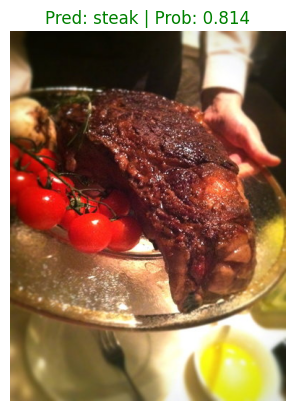

In [57]:
from PIL import Image
from typing import Tuple, List
import random
# random.seed(7)

test_img_path = random.choice(list(test_dir.glob('*/*.jpg')))
def pred_and_plot_image(model: torch.nn.Module,
                        image_path:str,
                        class_names:List[str],
                        image_size: Tuple[int, int]=(224,224),
                        transform: torchvision.transforms=None,
                        color: str='green',
                        device: torch.device='cpu'):


    test_img = Image.open(image_path)
    if transform:
        test_img_tsfm = transform(test_img)
    else:
        test_img_tsfm = T.Compose([
                                   T.Resize(image_size),
                                   T.ToTensor(),
                                   T.Normalize(mean=[0.485, 0.456, 0.406],
                                               std=[0.229, 0.224, 0.225]),
                                 ])
    utils.to_device(model, device)
    test_img_tsfm = utils.to_device(test_img_tsfm, device)

    model.eval()
    with torch.inference_mode():
        pred_logits = model(test_img_tsfm.unsqueeze(0))

        pred_prob = torch.softmax(pred_logits, 1)

        pred_label = torch.argmax(pred_prob, 1)

    plt.figure()
    plt.imshow(test_img)
    plt.title(f"Pred: {class_names[pred_label]} | Prob: {pred_prob.max():.3f}", c=color)
    plt.axis(False)

pred_and_plot_image(best_model,
                   test_img_path, 
                    class_names,
                    transform=manual_transforms,
                    device=device)

What a good looking function!

Let's test it out by making predictions on a few random images from the test set.

We can get a list of all the test image paths using `list(Path(test_dir).glob("*/*.jpg"))`, the stars in the `glob()` method say "any file matching this pattern", in other words, any file ending in `.jpg` (all of our images).

And then we can randomly sample a number of these using Python's [`random.sample(populuation, k)`](https://docs.python.org/3/library/random.html#random.sample) where `population` is the sequence to sample and `k` is the number of samples to retrieve.

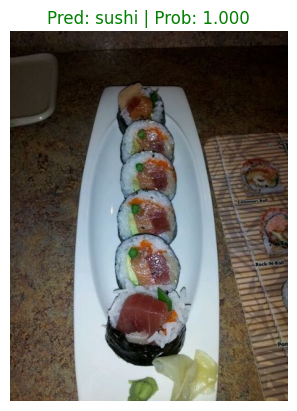

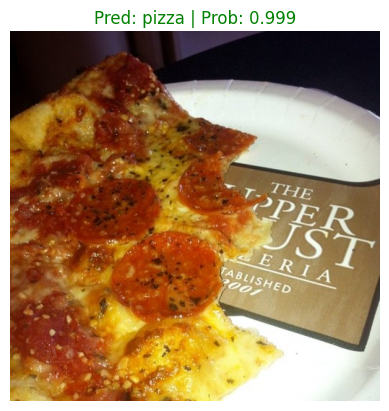

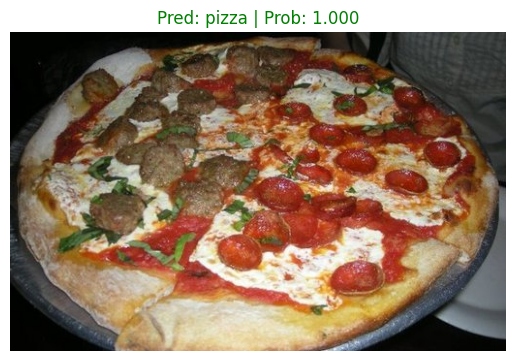

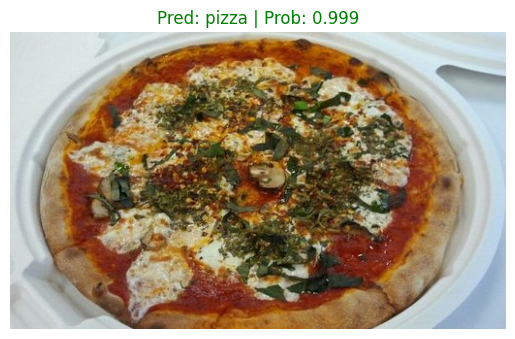

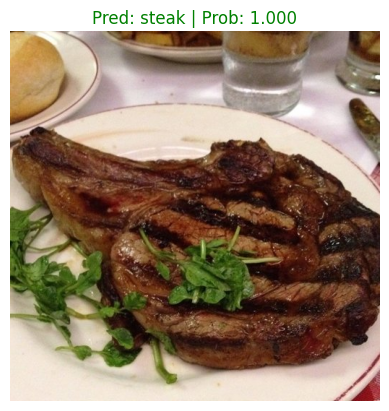

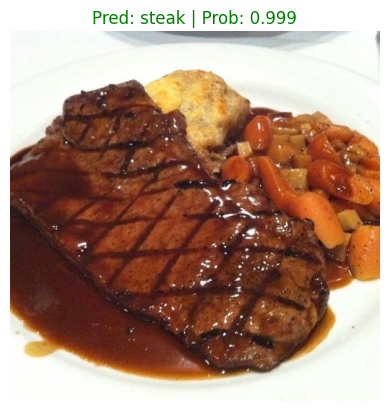

In [59]:
import random
# random.seed(7)

num_images_to_plot=6
test_img_path = random.sample(list(test_dir.glob('*/*.jpg')), 
                              k=num_images_to_plot)

for image_path in test_img_path:
    pred_and_plot_image(best_model,
                   image_path, 
                    class_names,
                    transform=manual_transforms,
                    device=device)

Nice!

Running the cell above a few times we can see our model performs quite well and often has higher prediction probabilities than previous models we've built.

This suggests the model is more confident in the decisions it's making. 

### 9.2 Predict on a custom image with the best model

Making predictions on the test dataset is cool but the real magic of machine learning is making predictions on custom images of your own.

So let's import the trusty [pizza dad image](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg) (a photo of my dad in front of a pizza) we've been using for the past couple of sections and see how our model performs on it.

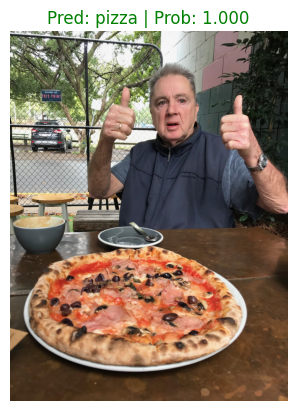

In [60]:
img_name = '04-pizza-dad.jpeg'
img_path = f'data/{img_name}'
pred_and_plot_image(model,
                   img_path, 
                    class_names,
                    transform=manual_transforms,
                    device=device)

Woah!

Two thumbs again!

Our best model predicts "pizza" correctly and this time with an even higher prediction probability (0.978) than the first feature extraction model we trained and used in [06. PyTorch Transfer Learning section 6.1](https://www.learnpytorch.io/06_pytorch_transfer_learning/#61-making-predictions-on-a-custom-image).

This again suggests our current best model (EffNetB2 feature extractor trained on 20% of the pizza, steak, sushi training data and for 10 epochs) has learned patterns to make it more confident of its decision to predict pizza.

I wonder what could improve our model's performance even further? 

I'll leave that as a challenge for you to investigate.

## Main takeaways

We've now gone full circle on the PyTorch workflow introduced in [01. PyTorch Workflow Fundamentals](https://www.learnpytorch.io/01_pytorch_workflow/), we've gotten data ready, we've built and picked a pretrained model, we've used our various helper functions to train and evaluate the model and in this notebook we've improved our FoodVision Mini model by running and tracking a series of experiments.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

You should be proud of yourself, this is no small feat!

The main ideas you should take away from this Milestone Project 1 are:

* The machine learning practioner's motto: *experiment, experiment, experiment!* (though we've been doing plenty of this already).
* In the beginning, keep your experiments small so you can work fast, your first few experiments shouldn't take more than a few seconds to a few minutes to run.
* The more experiments you do, the quicker you can figure out what *doesn't* work.
* Scale up when you find something that works. For example, since we've found a pretty good performing model with EffNetB2 as a feature extractor, perhaps you'd now like to see what happens when you scale it up to the whole [Food101 dataset](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html) from `torchvision.datasets`.
* Programmatically tracking your experiments takes a few steps to set up but it's worth it in the long run so you can figure out what works and what doesn't.
    * There are many different machine learning experiment trackers out there so explore a few and try them out.

## Exercises

> **Note:** These exercises expect the use of `torchvision` v0.13+ (released July 2022), previous versions may work but will likely have errors.

All of the exercises are focused on practicing the code above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 07](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/07_pytorch_experiment_tracking_exercise_template.ipynb)
* [Example solutions notebook for 07](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/07_pytorch_experiment_tracking_exercise_solutions.ipynb) (try the exercises *before* looking at this)
    * See a live [video walkthrough of the solutions on YouTube](https://youtu.be/cO_r2FYcAjU) (errors and all)


1. Pick a larger model from [`torchvision.models`](https://pytorch.org/vision/main/models.html) to add to the list of experiments (for example, EffNetB3 or higher). 
    * How does it perform compared to our existing models?
2. Introduce data augmentation to the list of experiments using the 20% pizza, steak, sushi training and test datasets, does this change anything?
    * For example, you could have one training DataLoader that uses data augmentation (e.g. `train_dataloader_20_percent_aug` and `train_dataloader_20_percent_no_aug`) and then compare the results of two of the same model types training on these two DataLoaders.
    * **Note:** You may need to alter the `create_dataloaders()` function to be able to take a transform for the training data and the testing data (because you don't need to perform data augmentation on the test data). See [04. PyTorch Custom Datasets section 6](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation) for examples of using data augmentation or the script below for an example:

```python
# Note: Data augmentation transform like this should only be performed on training data
train_transform_data_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
    normalize
])

# Helper function to view images in a DataLoader (works with data augmentation transforms or not) 
def view_dataloader_images(dataloader, n=10):
    if n > 10:
        print(f"Having n higher than 10 will create messy plots, lowering to 10.")
        n = 10
    imgs, labels = next(iter(dataloader))
    plt.figure(figsize=(16, 8))
    for i in range(n):
        # Min max scale the image for display purposes
        targ_image = imgs[i]
        sample_min, sample_max = targ_image.min(), targ_image.max()
        sample_scaled = (targ_image - sample_min)/(sample_max - sample_min)

        # Plot images with appropriate axes information
        plt.subplot(1, 10, i+1)
        plt.imshow(sample_scaled.permute(1, 2, 0)) # resize for Matplotlib requirements
        plt.title(class_names[labels[i]])
        plt.axis(False)

# Have to update `create_dataloaders()` to handle different augmentations
import os
from torch.utils.data import DataLoader
from torchvision import datasets

NUM_WORKERS = os.cpu_count() # use maximum number of CPUs for workers to load data 

# Note: this is an update version of data_setup.create_dataloaders to handle
# differnt train and test transforms.
def create_dataloaders(
    train_dir, 
    test_dir, 
    train_transform, # add parameter for train transform (transforms on train dataset)
    test_transform,  # add parameter for test transform (transforms on test dataset)
    batch_size=32, num_workers=NUM_WORKERS
):
    # Use ImageFolder to create dataset(s)
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)

    # Get class names
    class_names = train_data.classes

    # Turn images into data loaders
    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    return train_dataloader, test_dataloader, class_names
```

3. Scale up the dataset to turn FoodVision Mini into FoodVision Big using the entire [Food101 dataset from `torchvision.models`](https://pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html#torchvision.datasets.Food101)
    * You could take the best performing model from your various experiments or even the EffNetB2 feature extractor we created in this notebook and see how it goes fitting for 5 epochs on all of Food101.
    * If you try more than one model, it would be good to have the model's results tracked.
    * If you load the Food101 dataset from `torchvision.models`, you'll have to create PyTorch DataLoaders to use it in training.
    * **Note:** Due to the larger amount of data in Food101 compared to our pizza, steak, sushi dataset, this model will take longer to train.

## Extra-curriculum

* Read [The Bitter Lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html) blog post by Richard Sutton to get an idea of how many of the latest advancements in AI have come from increased scale (bigger datasets and bigger models) and more general (less meticulously crafted) methods.
* Go through the [PyTorch YouTube/code tutorial](https://pytorch.org/tutorials/beginner/introyt/tensorboardyt_tutorial.html) for TensorBoard for 20-minutes and see how it compares to the code we've written in this notebook.
* Perhaps you may want to view and rearrange your model's TensorBoard logs with a DataFrame (so you can sort the results by lowest loss or highest accuracy), there's a guide for this [in the TensorBoard documentation](https://www.tensorflow.org/tensorboard/dataframe_api). 
* If you like to use VSCode for development using scripts or notebooks (VSCode can now use Jupyter Notebooks natively), you can setup TensorBoard right within VSCode using the  [PyTorch Development in VSCode guide](https://code.visualstudio.com/docs/datascience/pytorch-support).
* To go further with experiment tracking and see how your PyTorch model is performing from a speed perspective (are there any bottlenecks that could be improved to speed up training?), see the [PyTorch documentation for the PyTorch profiler](https://pytorch.org/blog/introducing-pytorch-profiler-the-new-and-improved-performance-tool/).
* Made With ML is an outstanding resource for all things machine learning by Goku Mohandas and their [guide on experiment tracking](https://madewithml.com/courses/mlops/experiment-tracking/) contains a fantastic introduction to tracking machine learning experiments with MLflow.

In [61]:
def prediction(model: torch.nn.Module,
               test_dataloader:torch.utils.data.DataLoader,
               class_names:List[str],
               device: torch.device='cpu'):
    
    pred_label_list = []
    test_label_list = []

    utils.to_device(model, device)
#     test_dataloader = utils.to_device(test_dataloader, device)

    model.eval()
    with torch.inference_mode():
        for Xb, yb in test_dataloader:
            pred_logits = model(Xb.to(device))

            pred_prob = torch.softmax(pred_logits, 1)

            pred_label = torch.argmax(pred_prob, 1)
            
            pred_label_list.append(pred_label.cpu())
            test_label_list.append(yb)
        
    return torch.cat(pred_label_list,0), torch.cat(test_label_list,0)

In [62]:
pred_label_tensors, test_label_tensors = prediction(best_model,
                                               test_dataloader,
                                               class_names,
                                               device)

<AxesSubplot:>

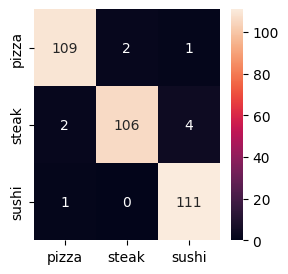

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_label_tensors.numpy(),pred_label_tensors.numpy())

plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='.0f',xticklabels=class_names, yticklabels=class_names)

In [64]:
print(classification_report(test_label_tensors.numpy(), pred_label_tensors.numpy()))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.98      0.95      0.96       112
           2       0.96      0.99      0.97       112

    accuracy                           0.97       336
   macro avg       0.97      0.97      0.97       336
weighted avg       0.97      0.97      0.97       336



In [65]:
test_img_dataset = test_dataloader.dataset.imgs

In [66]:
wrong_pred = torch.eq(pred_label_tensors, test_label_tensors)
wrong_idx = (wrong_pred==0).nonzero(as_tuple=True)[0]
wrong_idx

tensor([ 51, 107, 108, 116, 119, 120, 128, 158, 206, 224])

In [67]:
pred_label_tensors[:5], test_label_tensors[:5]

(tensor([0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0]))

data\new_food_file\food-101\test\steak\1288540.jpg
data\new_food_file\food-101\test\steak\66858.jpg
data\new_food_file\food-101\test\sushi\101625.jpg
data\new_food_file\food-101\test\steak\1627703.jpg
data\new_food_file\food-101\test\steak\1206166.jpg
data\new_food_file\food-101\test\pizza\2719697.jpg


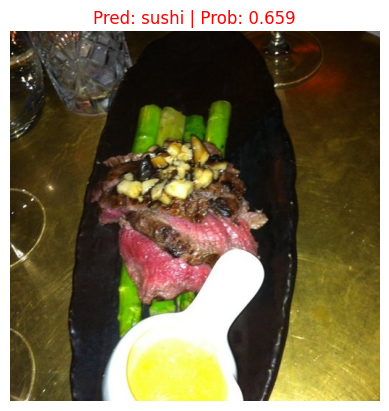

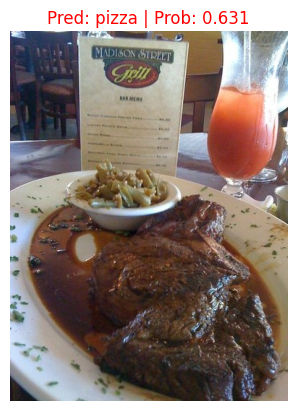

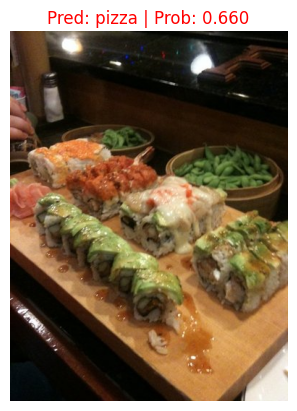

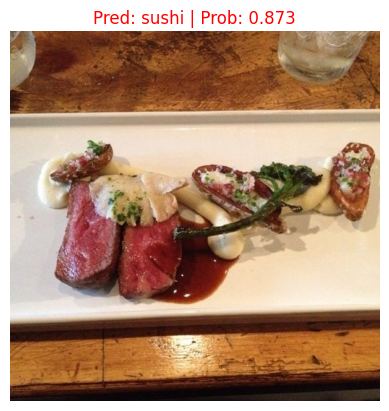

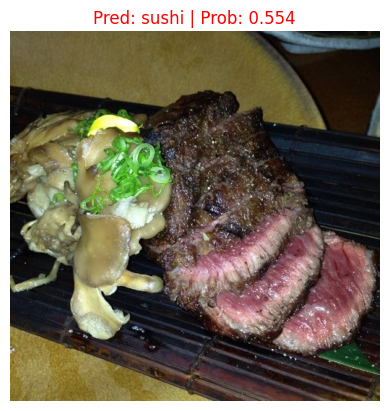

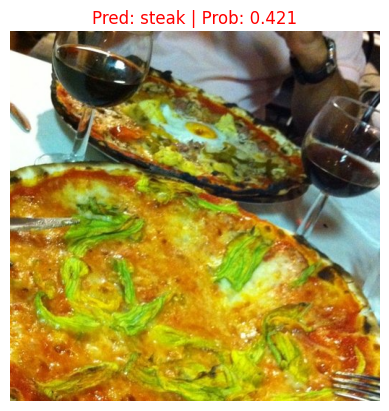

In [68]:
import random
# random.seed(7)

num_images_to_plot=6
wrong_pred_path = random.sample(wrong_idx.numpy().tolist(), 
                              k=num_images_to_plot)

for idx in wrong_pred_path:
    image_path, label = test_img_dataset[idx]
    print(image_path)
    pred_and_plot_image(best_model,
                   image_path, 
                    class_names,
                    transform=manual_transforms,
                    color='red',
                    device=device)

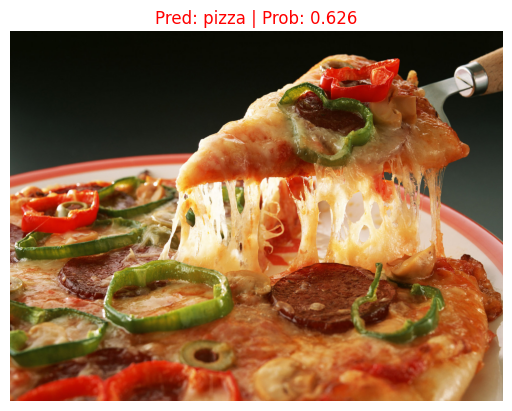

In [69]:
img_name = '2fSlice-of-Pizza-pizza-7383219-1600-1200.jpg'
img_path = f'data/{img_name}'
pred_and_plot_image(best_model,
                   img_path, 
                    class_names,
                    transform=manual_transforms,
                    color='red',
                    device=device)

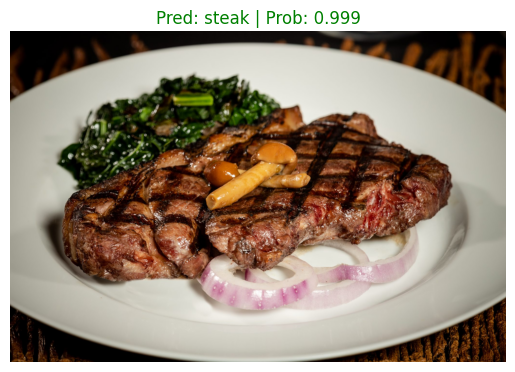

In [70]:
img_name = 'Bison-Boneless-Ribeye-Steak-Bison-Meat-Beck-Bulow-2048x1365.jpg'
img_path = f'data/{img_name}'
pred_and_plot_image(best_model,
                   img_path, 
                    class_names,
                    transform=manual_transforms,
                    color='green',
                    device=device)